#     Unsupervised Learning--Practical Introduction to machine Learning


## Introduction and objective of the session

The objective of this practical session is to manipulate and understand the machine learning problems and methods discussed in the course. In this concise report, we will focus on essential aspects of unsupervised machine learning, specifically clustering, density estimation, and dimensionality reduction.

## Essential Imports

### Importing libraries

In [19]:
"""
                    Libraries and Modules:

- 'warnings': Used to suppress warning messages during the execution of the code.
- 'numpy (as np)': Essential for working with numerical data and arrays.
- 'matplotlib.pyplot (as plt)': A powerful library for data visualization and creating plots.
- 'scipy': Offers a wide range of scientific computing functions and tools.
- 'sklearn.cluster.KMeans': Provides KMeans clustering for unsupervised learning.
- 'collections.Counter': Useful for counting occurrences of elements, often used for data analysis.
- 'sklearn.decomposition.PCA' and 'sklearn.decomposition.NMF': Principal Component Analysis (PCA) and Non-Negative Matrix Factorization (NMF) for dimensionality reduction.
- 'sklearn.metrics.silhouette_score': Measures the quality of clusters created by clustering algorithms.
- 'sklearn.metrics.cluster.adjusted_rand_score' and 'sklearn.metrics.cluster.rand_score': Metrics for assessing clustering performance.
- 'sklearn.mixture.GaussianMixture': Implements Gaussian Mixture Models for density estimation.
- 'sklearn.manifold.TSNE': t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction and data visualization.


"""
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA,NMF
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

## Importing Datasets

In [20]:
"""
Data Loading:

- 'temper': This variable loads data from the 'temper.npz' file which contains the following information:
• "data" : a 15×14 matrix containing for each of the 15 french cities the temperature for each month on the first 12 columns and the latitude and longitude of the cities in the last two columns. The data matrix x1 for this dataset will be the 15×12 matrix with only temperature.
• "villes" : a list of the names of the cities that will be used for readable legends in the figures and visualizing the cities in 2D (geographical position and/or dimensionality reduction).
• "varname" : a list of names for the variables/columns in the "data" matrix, containing month names and latitude/longitude.
- 'digit': This variable loads data from the 'digits.npz' file which is a small subset of the well known MNIST dataset (3 classes only 1000 samples per class on rain data) and contains images of written numbers and this file contains the following matrices:
• "x" and "xt": data matrices containing respectively n = 3000 and nt = 1500 training example of written digits. Each line in those matrices is a 28 × 28 image stored as a transposed vector (a line of size 784).
• "y" and "yt": the labels of the images described above. they are vectors containing the classes (1, 7, 8) of each images in x and xt. The samples are sorted by class.
"""
temper=np.load("temper.npz")
digit=np.load("digits.npz")
x1= temper["data"][:,:12]
months= temper["varname"][:-2]
Longitude= temper["data"][:,12:][:,1]
Latitude= temper["data"][:,12:][:,0]
villes= temper["villes"]
x2= digit["x"]
y2= digit["y"]


In [21]:
"""
Data preparation:
For the digits dataset, it is better to perform one simple pre-processing that scales the values between [0, 1] by dividing the data matrix by 255.
"""
x2=x2/255

## Calculating the mean of each dataset

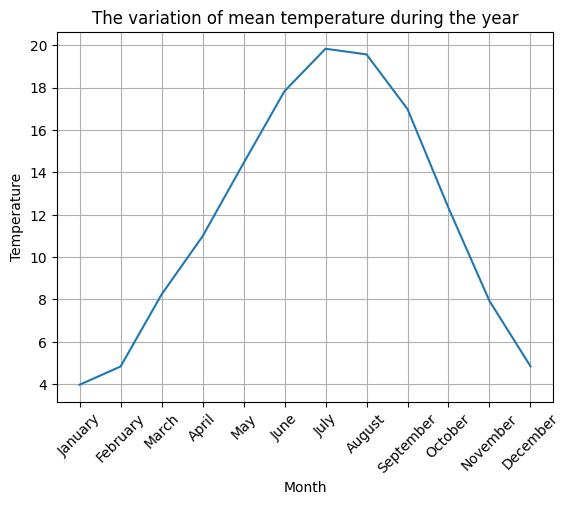

In [22]:
mean_city=np.mean(x1,axis=0)
plt.plot(mean_city.T)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("The variation of mean temperature during the year")
plt.grid(True)
plt.xticks(list(range(0, 12)), months.tolist(), rotation=45)

plt.show()


The plot illustrates the average temperature pattern throughout the year. It highlights a distinct seasonal variation with lower temperatures during the winter months and higher temperatures during the summer. This is indicative of a typical temperate climate. Notably, the plot's representation of the average temperature considers data from various cities, resulting in a moderated peak in summer temperatures. This occurs because the dataset includes cities from diverse regions, and there may be fewer cities with extremely hot climates. As a result, the mean temperature provides a balanced perspective on the annual temperature fluctuations.

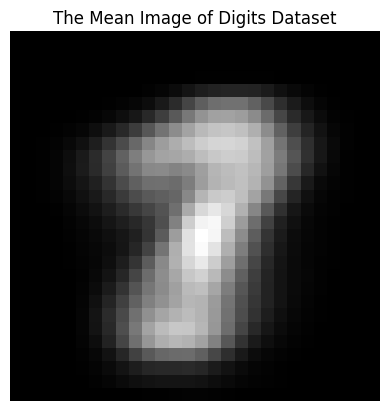

In [23]:
# Calculate the mean image by taking the average of all images along each pixel position
mean_image = x2.mean(axis=0).reshape(28, 28)

# Display the mean image using a grayscale colormap
plt.imshow(mean_image, cmap="gray")

# Set the title for the plot
plt.title("The Mean Image of Digits Dataset")

# Turn off axis for a cleaner display
plt.axis("off")

# Show the plot
plt.show()

The mean image presents a composite of individual images, merging them into a single representation. This phenomenon occurs because our dataset is well-balanced, containing an equal number of occurrences for each digit. As a result, the mean image is a blend of the various digit images, that's why we don't have a significant digit in the image.

## Visualisation of the Datasets

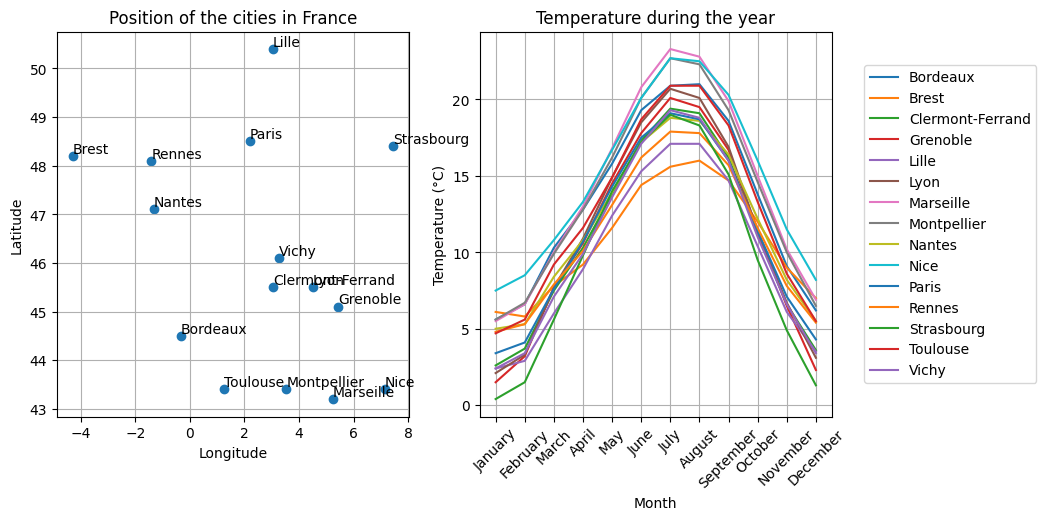

In [24]:
# Create a 1x2 subplot grid for visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the temperature data for different cities
ax[1].plot(x1.T)  # Transpose the temperature data for plotting
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Temperature (°C)")
ax[1].legend(villes, loc="center right", bbox_to_anchor=(1.6, 0.5))
ax[1].grid(True)
ax[1].set_title("Temperature during the year")
ax[1].set_xticks(list(range(0, 12)), months.tolist(), rotation=45)

# Scatter plot to show the positions of cities in France
ax[0].scatter(Longitude, Latitude)

# Add city labels to the scatter plot
for i, city in enumerate(villes):
    ax[0].text(Longitude[i], Latitude[i], city, fontsize=10, ha='left', va='bottom')
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].set_title("Position of the cities in France")
ax[0].grid(True)

# Display the plot
plt.show()

We observe the temperature variations in different cities throughout the course of a year, with each line representing a specific city. This visualization enables us to compare and contrast how temperatures fluctuate across cities over the course of the year.

The second subplot offers a spatial perspective by plotting the geographical positions of cities in France using their longitude and latitude coordinates. This representation allows us to gain insights into the distribution and relative locations of cities in France. It complements the temperature variations displayed in the first subplot, facilitating our understanding of the relationship between climate differences and geographical locations.

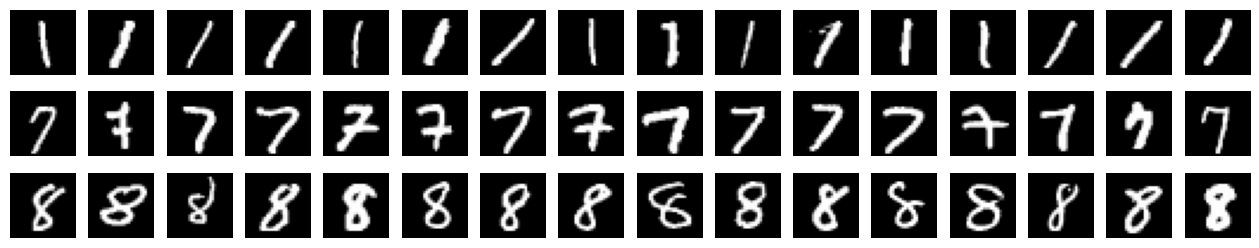

In [25]:
# Randomly select 48 indices from [0,1000]
selected_indices = np.random.choice(1000, 48, replace=False)

# Create a 3x16 grid of subplots for visualizing the images
fig, ax = plt.subplots(3, 16, figsize=(16, 3))

# Initialize a variable to keep track of the current row (j)
j = -1

# Loop through the selected indices and plot each digit in a line
for i, x in enumerate(selected_indices):
    # Check if it's time to move to the next row
    if i % 16 == 0:
        j = j + 1

    # Reshape the image data from 1D to 2D (28x28 pixels)
    image = x2[j*1000+x, :].reshape(28, 28)

    # Display the image on the corresponding subplot
    ax[j, (i % 16)].imshow(image, cmap="gray")

    # Turn off the axis for a cleaner display
    ax[j, (i % 16)].axis("off")

# Show the plot with the displayed images
plt.show()

In this figure, we showcase a selection of random samples from our training dataset. The visual representation of these images allows us to observe various digits present in our dataset. Notably, our dataset encompasses the digits 7, 8, and 1. The displayed images offer a glimpse into the diversity of handwritten digits that our model will be trained to recognize and classify.

## Clustering

### Clustering Cities dataset

In [26]:
# Create a K-Means clustering model with 3 clusters and a fixed random state for reproducibility
kmeans_temper = KMeans(n_clusters=3, random_state=0)

# Fit the K-Means model to the 'x1' data
kmeans_temper.fit(x1)

KMeans(n_clusters=3, random_state=0)

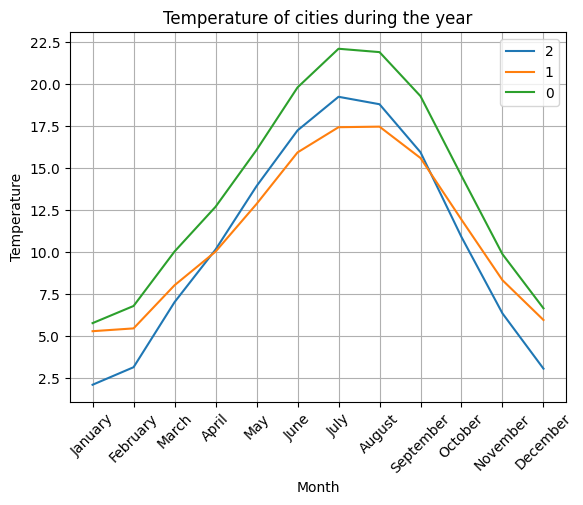

In [27]:
# Retrieve the cluster centroids from the K-Means model for temperature data
k_means_centroids_temper = kmeans_temper.cluster_centers_

# Retrieve the cluster labels assigned to each data point
estimated_labels = kmeans_temper.labels_

# Plot the cluster centroids for each cluster
plt.plot(k_means_centroids_temper.T)

# Create a legend using the cluster labels
plt.legend(estimated_labels)

# Set labels and title for the plot
plt.xlabel("Month")               # X-axis label
plt.ylabel("Temperature")         # Y-axis label
plt.title("Temperature of cities during the year")  # Plot title

# Set custom ticks on the X-axis to represent the months
plt.xticks(list(range(0, 12)), months.tolist(), rotation=45)

# Display grid lines on the plot
plt.grid(True)

**Interepretation**


The classification of the cities into three distinct clusters appears to be influenced by their geographical positions. These clusters can be described as follows:

1)Cluster 0: This cluster exhibits the highest temperatures, particularly when compared to the other clusters. These cities seem to be located in the southern region of France,where warmer temperatures are more prevalent.

2)Cluster 1: Cities in this cluster display a temperature range that falls between the extremes observed in Cluster 0 and Cluster 2. This suggests that these cities are likely situated in the central part of France, where temperatures are relatively moderate and balanced throughout the year.

3)Cluster 2:represents cities with the lowest temperatures, particularly during the winter months. This cluster likely includes cities in the northern region of France, where colder temperatures are more prevalent, especially in the winter season.

In summary, this classification reflects a clear pattern of temperature distribution across different geographical regions in France, with cities in the south generally experiencing warmer temperatures, those in the center having moderate conditions, and cities in the north facing colder winters.


**Changing the number of K in KMeans**

In [28]:
def draw_figures_with_different_k(n):
    """
    Generate subplots with varying values of K for K-Means clustering and visualize the centroids.

    Parameters:
    n (int): The number of subplots to create with different values of K.
    """

    # Create a grid of subplots, with n/4 rows and 4 columns
    fig, ax = plt.subplots(n // 4, 4, figsize=(20, 12))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0, top=0.9, wspace=0.4, hspace=0.4)

    k = -1
    for i in range(n):
        kmeans_temper = KMeans(i + 1)
        kmeans_temper.fit(x1)
        k_means_centroids_temper = kmeans_temper.cluster_centers_
        estimated_labels = kmeans_temper.labels_

        if i % 4 == 0:
            k = k + 1

        # Plot the cluster centroids in the current subplot
        ax[k, i % 4].plot(k_means_centroids_temper.T)
        ax[k, i % 4].legend(estimated_labels)
        ax[k, i % 4].set_xlabel("Month")
        ax[k, i % 4].set_ylabel("Temperature")
        ax[k, i % 4].set_title("Temperature of cities during the year")
        ax[k, i % 4].set_xticks(list(range(0, 12)), months.tolist(), rotation=45)
        ax[k, i % 4].grid(True)

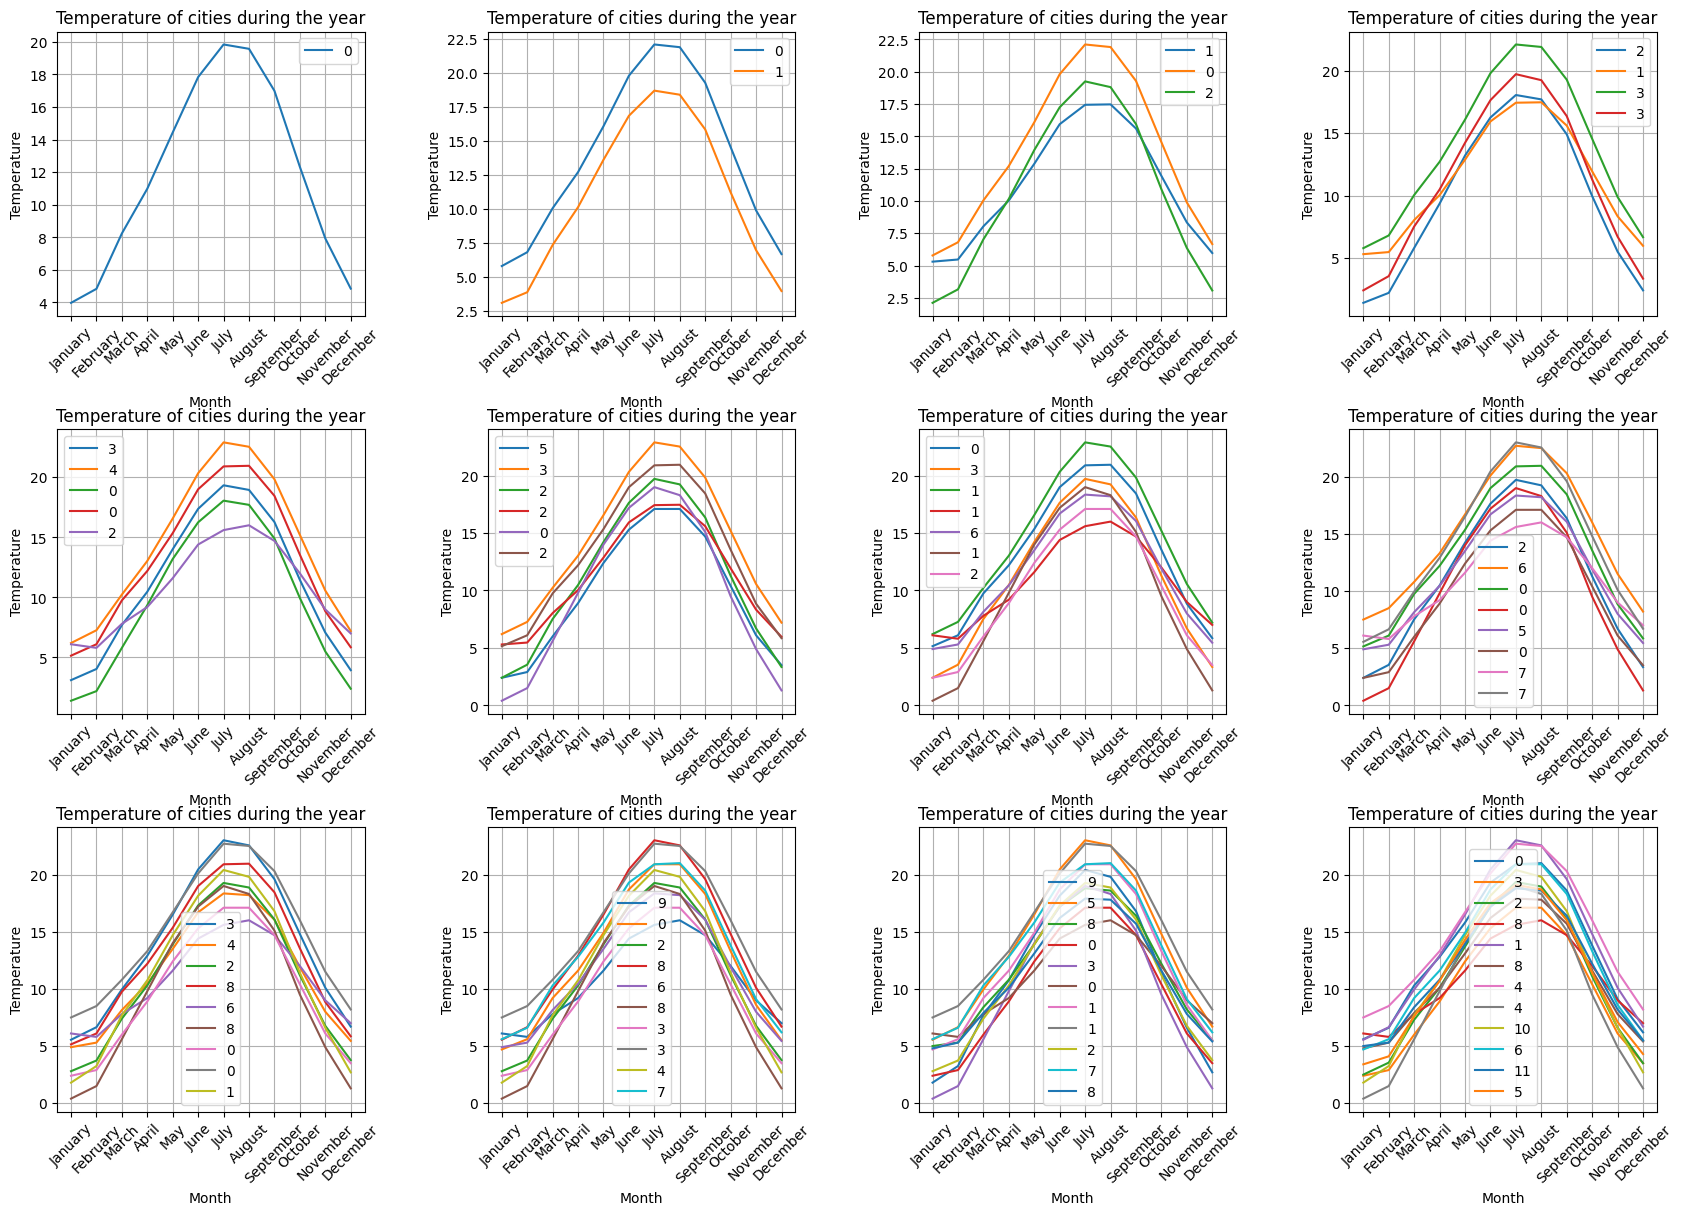

In [29]:
draw_figures_with_different_k(12)


As we vary the number of clusters (K) in the K-Means clustering, it becomes evident that the efficiency of the clustering diminishes. Notably, increasing the number of clusters beyond 3 often results in clusters that share the same labels, which suggests redundancy. In my perspective, the clustering appears to be most efficient when the number of clusters is limited to 2 or 3, as these values provide meaningful and non-redundant divisions of the data.

**Calculating scores to pick the most efficient k**

In [30]:
def elbow_method(data, n):
    """
    Perform the Elbow Method to find the optimal number of clusters (k) for K-Means clustering.

    Parameters:
    data (array-like): The dataset on which clustering will be performed.
    n (int): The range of values for the number of clusters to evaluate.

    Returns:
    None
    """
    wcss = []

    # Iterate through the range of cluster numbers (k)
    for k in range(1, n):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow curve to determine the optimal k
    plt.plot(range(1, n), wcss, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

In [31]:
def silhouette_score_plot(data, n):
    """
    Generate a plot of Silhouette Scores for different numbers of clusters (k) in K-Means clustering.

    Parameters:
    data (array-like): The dataset for which silhouette scores will be calculated.
    n (int): The range of values for the number of clusters to evaluate.

    Returns:
    None
    """
    silhouette_scores = []

    # Calculate silhouette scores for each k
    for k in range(2, n):
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores for different k values
    plt.plot(range(2, n), silhouette_scores, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.show()

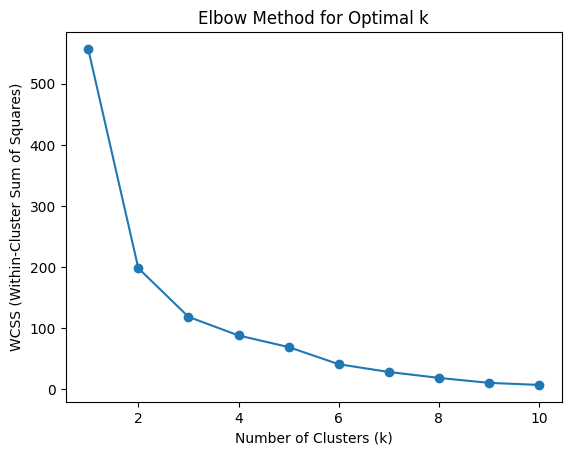

In [32]:
elbow_method(x1,11)

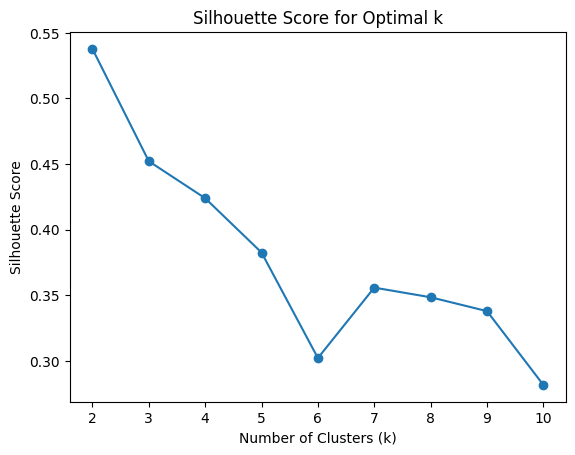

In [33]:
silhouette_score_plot(x1,11)

***Interpretation***:

We can see here that by using the elbow method and silhouette score that the "Both the elbow method and silhouette score analysis reveal that the ideal number of clusters (k) is 2. This choice is intuitive as it naturally divides our data into two distinct categories: cities located in the north and those situated in the south.

However, increasing the number of clusters to 3 is also justifiable. This decision aligns with our goal of categorizing the data into three groups, considering the presence of cities along the Atlantic coast. These coastal cities, being closer to the sea, tend to have lower temperatures in the summer compared to inland cities.

In summary, selecting either k=2 or k=3 as the number of clusters is appropriate, as both choices align with meaningful divisions based on geographical and climatic factors."

In [34]:
# fix K =2
kmeans_temper = KMeans(n_clusters=2, random_state=0)

# Fit the K-Means model to the 'x1' data
kmeans_temper.fit(x1)
# Retrieve the cluster centroids from the K-Means model for temperature data
k_means_centroids_temper = kmeans_temper.cluster_centers_

# Retrieve the cluster labels assigned to each data point
estimated_labels = kmeans_temper.labels_


In [35]:
# Create an empty dictionary to store cities in clusters
dict_cluster_villes = {}

# Loop through the estimated labels assigned to each data point
for i in estimated_labels:
    # Create an empty list for each cluster
    dict_cluster_villes[i] = []

# Loop through the estimated labels and cities
for i, j in enumerate(estimated_labels):
    # Append each city to its respective cluster in the dictionary
    dict_cluster_villes[j].append(villes[i])

# Print the dictionary that maps clusters to the cities they contain
print(dict_cluster_villes)

{1: ['Bordeaux', 'Marseille', 'Montpellier', 'Nice', 'Toulouse'], 0: ['Brest', 'Clermont-Ferrand', 'Grenoble', 'Lille', 'Lyon', 'Nantes', 'Paris', 'Rennes', 'Strasbourg', 'Vichy']}


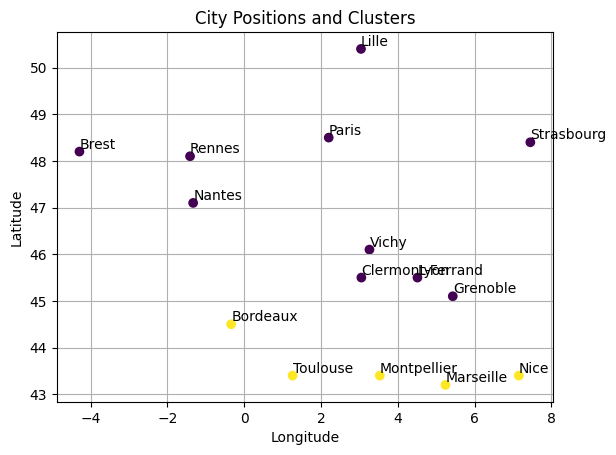

In [36]:
# Create a scatter plot to visualize city positions colored by their estimated cluster labels
plt.scatter(Longitude, Latitude, c=estimated_labels)

# Set labels and title for the plot
plt.xlabel("Longitude")            # X-axis label
plt.ylabel("Latitude")             # Y-axis label
plt.title("City Positions and Clusters")  # Plot title


plt.grid(True)

# Add city labels to the scatter plot
for i, city in enumerate(temper["villes"]):
    plt.text(Longitude[i], Latitude[i], city, fontsize=10, ha='left', va='bottom')

**Interpretation:**

The K-Means clustering analysis effectively captures geographical properties in our dataset. It's evident that cities in the northwestern region of France, characterized by low longitudes and high latitudes, are grouped into Cluster 1, signifying their relatively cooler climate.

Conversely, cities situated in the southern part of France, characterized by low latitudes, are categorized into Cluster 2. Meanwhile, cities located in the eastern and northern parts of France are grouped into Cluster 0.

These observations underscore the meaningfulness of the K-Means clustering. It successfully segments cities based on their geographical positions and associated temperature patterns, aligning with our geographical expectations.

### Clustering Digits dataset

In [37]:
# Create a K-Means clustering model with 3 clusters for digits dataset
kmeans_digits = KMeans(n_clusters=3)

# Fit the K-Means model to the 'x2' data, which is often image data or digit features
kmeans_digits.fit(x2)

# Retrieve the cluster centroids obtained from the K-Means model
k_means_centroids_digits = kmeans_digits.cluster_centers_

# Get the estimated cluster labels for each data point
k_means_digits_estimated_labels = kmeans_digits.labels_

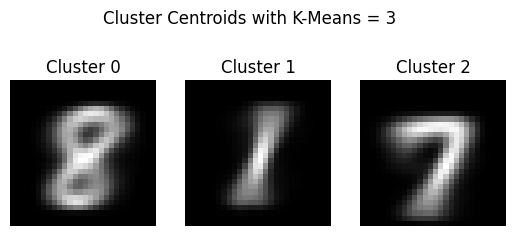

In [38]:
"""
    Display the cluster centroids obtained from K-Means clustering.

    Parameters:
    centroids (array-like): The centroids of K-Means clusters.
    k (int): The number of clusters used in K-Means.

    Returns:
    None
    """

# Create subplots to display cluster centroids
for i in range(3):
    plt.subplot(1, 3, i + 1)

    # Reshape the centroid to the original image shape (28x28)
    centroid_image = k_means_centroids_digits[i].reshape(28, 28)

    # Display the centroid image with a grayscale colormap
    plt.imshow(centroid_image, cmap='gray')

    # Set the title for each subplot to indicate the cluster number
    plt.title(f'Cluster {i}')

    # Turn off axis for a cleaner display
    plt.axis('off')

# Set a super title for all subplots
plt.suptitle(f'Cluster Centroids with K-Means = {3}')

# Adjust the subplot layout for better positioning
plt.subplots_adjust(top=1.25)


In the cluster centroids, we observe a distinct pattern where each centroid appears to correspond to a specific digit. This suggests that our clustering has effectively partitioned the data by considering the underlying digit of each image. Each cluster tends to aggregate images with similar digits. Considering that there are three different digits, it becomes apparent that selecting 'k' (the number of clusters) as 3 is reasonable, as it allows us to capture and differentiate these three distinct digit categories effectively.


**changing the number of clusters for digits images**

In [39]:
def changing_k_for_digits(k):
    """
    Visualize K-Means cluster centroids for different values of 'k' in digit data.

    Parameters:
    k (int): The maximum value of 'k' (number of clusters) to evaluate.

    Returns:
    None
    """

    # Loop through different values of 'k' from 2 to 'k'
    for i in range(2, k + 1):
        fig, ax = plt.subplots(1, i)

        # Set a super title for the subplots
        plt.suptitle(f'Cluster Centroids With Kmeans = {i}')

        # Adjust the top position for better layout
        plt.subplots_adjust(top=1.2)

        # Loop through the clusters
        for j in range(i):
            kmeans_digits_try = KMeans(i, random_state=0)
            kmeans_digits_try.fit(x2)
            k_means_centroids_digits_try = kmeans_digits_try.cluster_centers_

            # Reshape and display the centroid image
            centroid_image = k_means_centroids_digits_try[j].reshape(28, 28)
            ax[j].imshow(centroid_image, cmap='gray')
            ax[j].set_title(f'Cluster {j + 1}')
            ax[j].axis('off')


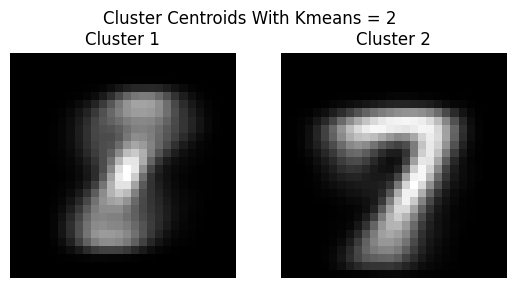

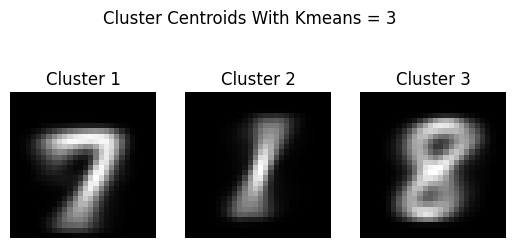

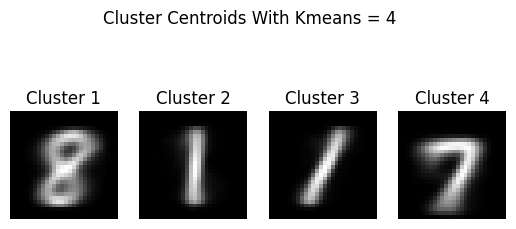

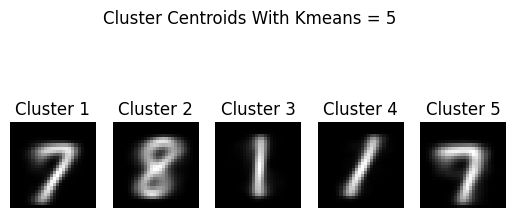

In [40]:
 changing_k_for_digits(5)

**Interpretation**

Through the process of experimenting with varying cluster numbers, we can discern that if 'K' (the number of clusters) is set to a value less than 3, the model doesn't provide a distinct representation for each digit category within the clusters. On the other hand, when 'K' exceeds 3, clusters tend to overlap, with multiple clusters representing the same digit. In my perspective, the optimal number of clusters for the digits dataset is 3, as this choice aligns with the actual number of distinct digits present in the dataset. Selecting 'K=3' enables the model to effectively distinguish and represent the three unique digit categories.

**Analysing the distribution of digits with different clusters**

In [41]:
"""Analyze the distribution of digits within different clusters."""

# Create an empty dictionary to store digits in clusters
dict_cluster_digits = {}

# Iterate through the estimated cluster labels
for i in k_means_digits_estimated_labels:
    dict_cluster_digits[i] = []

# Populate the dictionary with digit labels for each cluster
for i, j in enumerate(k_means_digits_estimated_labels):
    dict_cluster_digits[j].append(y2[i, 0])

# Loop through each cluster and print the digit distribution
for i in range(3):
    # Count the occurrences of each digit in the cluster using Counter
    digit_distribution = dict(Counter(dict_cluster_digits[i]))

    # Print the digit distribution for the cluster
    print(f"The distribution of digits in Cluster {i}: {digit_distribution}")

The distribution of digits in Cluster 0: {1: 6, 7: 11, 8: 828}
The distribution of digits in Cluster 1: {1: 990, 7: 89, 8: 159}
The distribution of digits in Cluster 2: {1: 4, 7: 900, 8: 13}


In [42]:
"""Find indices of misclassified digits within clusters.
create a dict: A dictionary containing misclassified indices for each cluster."""


# Create an empty dictionary to store misclassified indices for each cluster
dict_index_false = {}

# Iterate through the estimated cluster labels
for i in k_means_digits_estimated_labels:
    dict_index_false[i] = []

# Check if the digit in the cluster matches the true digit label
for i, j in enumerate(k_means_digits_estimated_labels):
    # Using Counter to find the most common digit in the cluster
    most_common_digit = Counter(dict_cluster_digits[j]).most_common(1)[0][0]

    if most_common_digit != y2[i, 0]:
        dict_index_false[j].append(i)

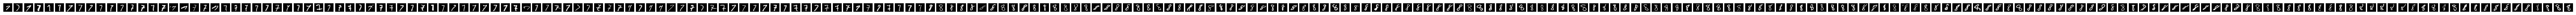

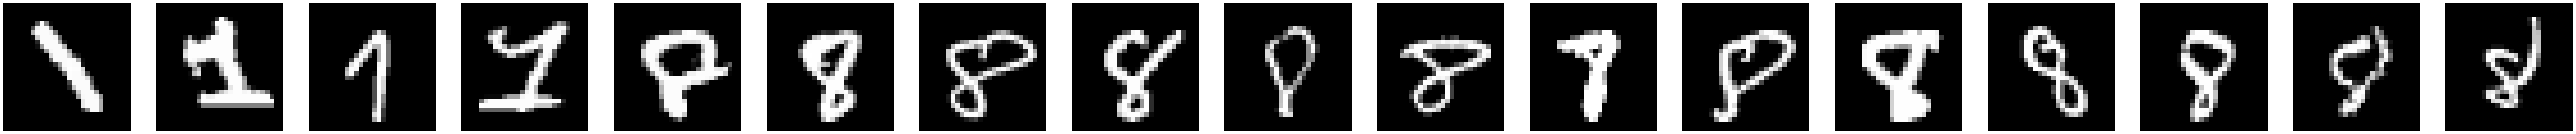

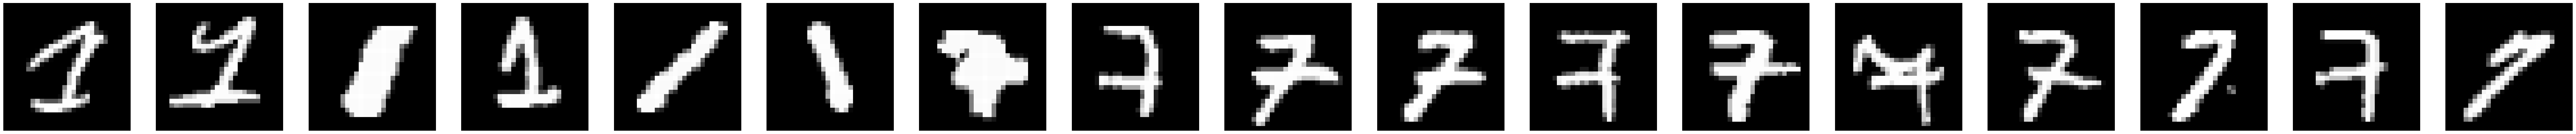

In [43]:
for cluster, misclassified_indices in dict_index_false.items():
      if len(misclassified_indices) != 0:
          # Create a subplot for each misclassified image in the cluster
          fig, ax = plt.subplots(1, len(misclassified_indices), figsize=(100, 100))

          for k, j in enumerate(misclassified_indices):
              # Retrieve and reshape the misclassified image
              misclassified_image = x2[j, :].reshape(28, 28)

              # Display the misclassified image with a grayscale colormap
              ax[k].imshow(misclassified_image, cmap="gray")

              # Turn off axis for cleaner display
              ax[k].axis("off")
plt.show()

**Interpretation**

In our analysis, it's evident that each cluster doesn't perfectly represent a distinct class of digits from the dataset. This discrepancy is noticeable as each cluster contains a mixture of the three digit classes, indicating a degree of classification error. This observation is reinforced by the created dictionary, where we paired cluster labels with true digit labels, revealing instances where multiple digits share the same cluster.

However, it's essential to note that the cluster centroids, which represent the majority digit within each cluster, provide a true image of the prevalent digit category in that cluster. These centroids effectively showcase the primary digit association for each cluster, offering a clearer understanding of the predominant digit category within the data.


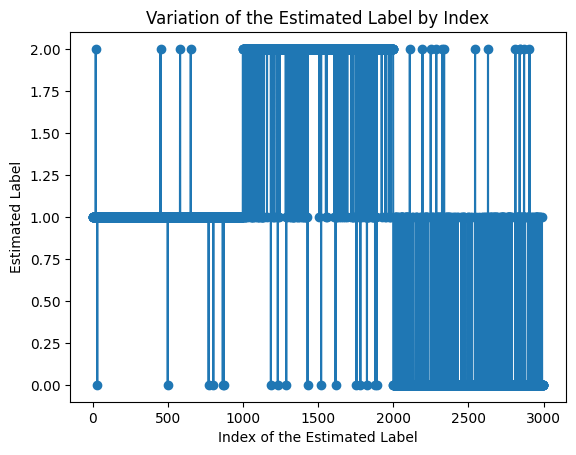

In [44]:
# Create a plot of the estimated labels by index
plt.plot(k_means_digits_estimated_labels, marker="o", linestyle="-")

# Set the title of the plot
plt.title("Variation of the Estimated Label by Index")

# Label the x-axis
plt.xlabel("Index of the Estimated Label")

# Label the y-axis
plt.ylabel("Estimated Label")

# Display the plot
plt.show()

**Interpretation**

The absence of a piecewise constant pattern in the graph suggests that our clustering is not perfect. The fluctuations in estimated labels as we move across the data indices indicate errors in our clustering. These errors could be attributed to various factors, including the quality and complexity of the MNIST dataset used for clustering.

**Evaluating the performance of the clustering**

In [45]:
# Calculate and print the Rand Score
rand_score_value = rand_score(y2.reshape(3000,), k_means_digits_estimated_labels)
print(f"The Rand Score: {rand_score_value}")

# Calculate and print the Adjusted Rand Score
adjusted_rand_score_value = adjusted_rand_score(y2.reshape(3000,), k_means_digits_estimated_labels)
print(f"The Adjusted Rand Score: {adjusted_rand_score_value}")

The Rand Score: 0.8811712793153273
The Adjusted Rand Score: 0.7344873296752322


**Interpretation**

Our scores indicate that the clustering exhibits a notable level of agreement with the ground truth or reference labels. This suggests that the clustering results align relatively well with the true digit categories in the dataset.

**Adjusting K and see the performance of the model**

In [46]:
# Set the maximum number of clusters (k)
k = 10

# Loop through different values of 'k' from 1 to k-1
for i in range(1, k):
    # Create a K-Means model with 'i' clusters and set a random seed for reproducibility
    kmeans_digits_try = KMeans(i, random_state=0)

    # Fit the K-Means model to the digit data
    kmeans_digits_try.fit(x2)

    # Get the cluster centroids and estimated labels
    k_means_centroids_digits_try = kmeans_digits_try.cluster_centers_
    k_means_digits_estimated_labels_try = kmeans_digits_try.labels_

    # Calculate and print the Adjusted Rand Score and Rand Score for the current 'k'
    adjusted_rand_score_value = adjusted_rand_score(y2.reshape(3000,), k_means_digits_estimated_labels_try)
    rand_score_value = rand_score(y2.reshape(3000,), k_means_digits_estimated_labels_try)
    print(f"For k={i}, Adjusted Rand Score: {adjusted_rand_score_value}, Rand Score: {rand_score_value}")

For k=1, Adjusted Rand Score: 0.0, Rand Score: 0.33311103701233746
For k=2, Adjusted Rand Score: 0.42155790084160727, Rand Score: 0.6976861175947539
For k=3, Adjusted Rand Score: 0.7353304173178205, Rand Score: 0.8815562965432923
For k=4, Adjusted Rand Score: 0.6708203951991278, Rand Score: 0.8619230854729354
For k=5, Adjusted Rand Score: 0.5736927506356786, Rand Score: 0.8278041569412026
For k=6, Adjusted Rand Score: 0.4876703520386158, Rand Score: 0.8005895298432811
For k=7, Adjusted Rand Score: 0.44523507409449864, Rand Score: 0.7870979215293987
For k=8, Adjusted Rand Score: 0.4010456578545345, Rand Score: 0.7746142047349116
For k=9, Adjusted Rand Score: 0.35420484504402916, Rand Score: 0.7606519951094809


**Interpretation**

We observe that the optimal value for 'k' is 3. When we vary this parameter, the Rand Index (RI) and Adjusted Rand Index (ARI) scores demonstrate a decline as 'k' deviates from 3, indicating that the quality of clustering deteriorates when 'k' is not set to its optimal value."


##Density estimation

### Temperature Dataset

In [47]:
# Create a Gaussian Mixture Model (GMM) with 2 components and diagonal covariance matrix
Gmm_temper = GaussianMixture(n_components=2, covariance_type="diag")

# Fit the GMM model to the temperature data
Gmm_temper.fit(x1)

GaussianMixture(covariance_type='diag', n_components=2)

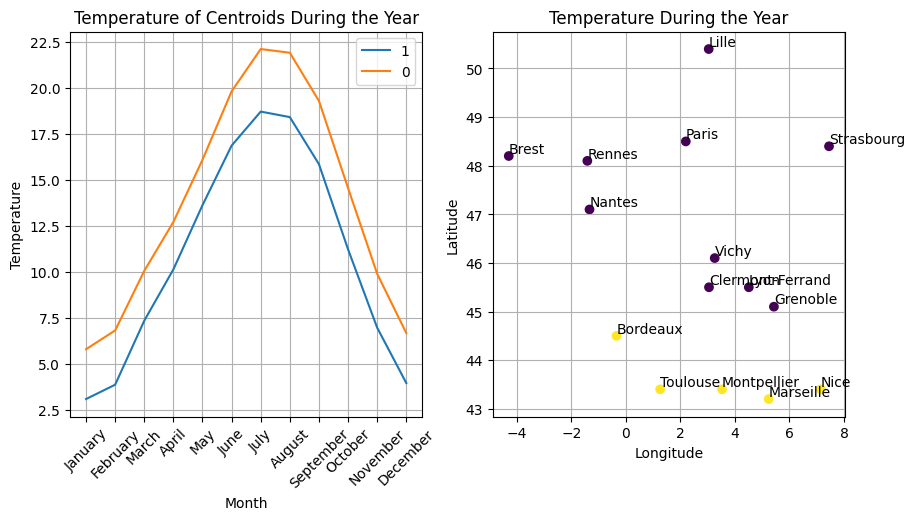

In [48]:
# Create a 1x2 subplot with a specific figure size
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the centroids of the Gaussian Mixture Model
ax[0].plot(Gmm_temper.means_.T)
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Temperature")
ax[0].set_title("Temperature of Centroids During the Year")
ax[0].grid(True)

# Create a legend for the centroids
ax[0].legend(Gmm_temper.predict(x1))

# Set custom x-axis ticks with months
ax[0].set_xticks(list(range(0, 12)), months.tolist(), rotation=45)

# Create a scatter plot of cities' locations colored by cluster predictions
ax[1].scatter(Longitude, Latitude, c=Gmm_temper.predict(x1))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_title("Temperature During the Year")
ax[1].grid(True)

# Add labels for each city on the scatter plot
for i, city in enumerate(temper["villes"]):
    ax[1].text(Longitude[i], Latitude[i], city, fontsize=10, ha='left', va='bottom')

# Display the entire plot
plt.show()

**Interpretation**

In this analysis, we observe two distinct clusters that exhibit significant dissimilarities. These clusters could potentially correspond to cities in different geographical regions, specifically, the southern and northern cities of the area under study. This assumption is supported by the clear contrast in temperature patterns throughout the year; the first cluster consistently maintains lower temperatures compared to the second cluster, indicating a notable distinction between these two groups of cities

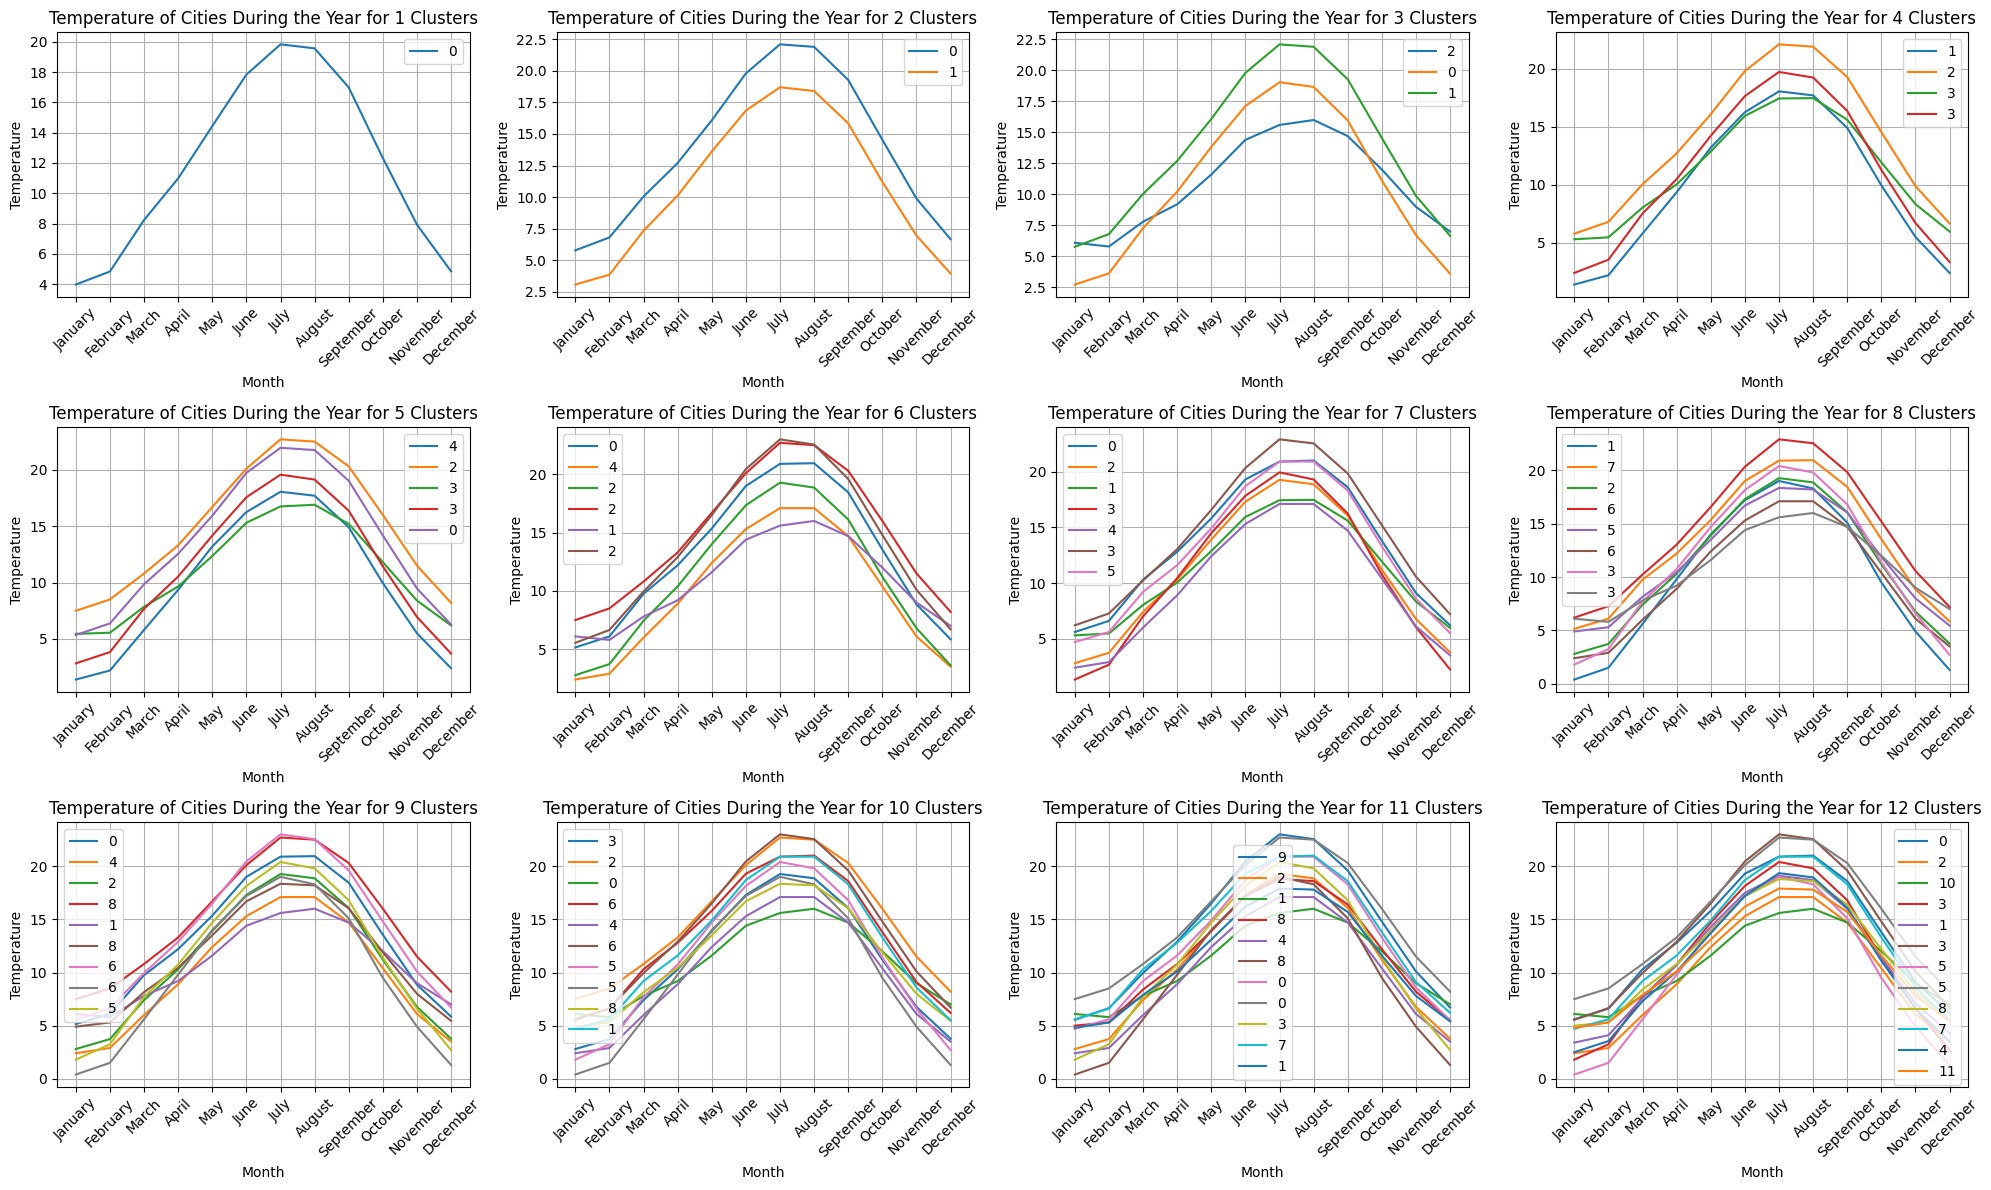

In [49]:
# Set the number of clusters
n = 12

# Create a grid of subplots
fig, ax = plt.subplots(n // 4, 4, figsize=(20, 12))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.4)

# Initialize a variable for subplot row
k = -1

# Loop through different numbers of clusters
for i in range(n):
    # Create a Gaussian Mixture Model with 'i+1' clusters and diagonal covariance matrix
    GMM_temper_try = GaussianMixture(i + 1, covariance_type="diag")
    GMM_temper_try.fit(x1)

    # Get the cluster means and predicted labels
    GMM_temper_try_means = GMM_temper_try.means_
    estimated_labels = GMM_temper_try.predict(x1)

    # Organize subplots in rows and columns
    if i % 4 == 0:
        k = k + 1

    # Plot the cluster means and set subplot properties
    ax[k, i % 4].plot(GMM_temper_try_means.T)
    ax[k, i % 4].legend(estimated_labels)
    ax[k, i % 4].set_xlabel("Month")
    ax[k, i % 4].set_ylabel("Temperature")
    ax[k, i % 4].set_title(f'Temperature of Cities During the Year for {i+1} Clusters')
    ax[k, i % 4].set_xticks(list(range(0, 12)), months.tolist(), rotation=45)
    ax[k, i % 4].grid(True)
    plt.tight_layout()
# Display the subplots
plt.show()

Evaluate the performance by silhouette score

In [50]:
def silhouette_score_plot_gmm(data, n):
    """
    Plot the silhouette scores for different numbers of clusters (k) in a Gaussian Mixture Model (GMM).

    Parameters:
    data (array-like): The input data for clustering.
    n (int): The maximum number of clusters to consider.

    Returns:
    None: The function displays the silhouette score plot.
    """

    silhouette_scores = []

    # Calculate silhouette scores for each k
    for k in range(2, n):
        GMM_temper_try = GaussianMixture(k, covariance_type="diag")
        cluster_labels = GMM_temper_try.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores for different k values
    plt.plot(range(2, n), silhouette_scores, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.show()

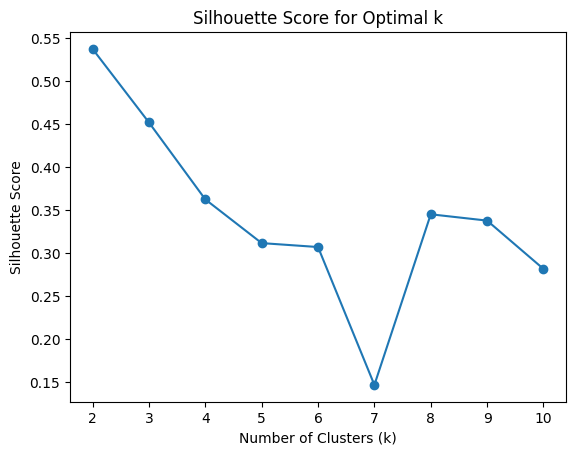

In [51]:
silhouette_score_plot_gmm(x1,11)

**Interpretation**

In my analysis, I have found that the most suitable values for K are 2 and 3. These choices allow us to represent our dataset with a meaningful division. With 3 Gaussian mixtures, we can roughly classify the regions into three distinct groups: the southern cities, the northern cities, and those located near the sea. Alternatively, with 2 Gaussian mixtures, we differentiate between the northern and southern cities.

Notably, as we increase K beyond 3, the clusters become closely packed, making it challenging to distinguish them effectively. This results in cluster overlap and reduces the model's ability to differentiate between different groups.


**Changing the type of covariance and see the difference**

In [52]:
def changing_covariance_type(type_covariance):
    """
    Plot the temperature analysis with different covariance types for Gaussian Mixture Model.

    Parameters:
    type_covariance (str): The covariance type to use (e.g., 'spherical', 'diag', 'tied', 'full').

    Returns:
    None: The function displays the temperature analysis plots.
    """

    # Create a Gaussian Mixture Model with 2 components and the specified covariance type
    Gmm_temper = GaussianMixture(2, covariance_type=type_covariance)
    Gmm_temper.fit(x1)

    # Create a 1x2 subplot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the centroids of the Gaussian Mixture Model
    ax[0].plot(Gmm_temper.means_.T)
    ax[0].set_xlabel("Month")
    ax[0].set_ylabel("Temperature")
    ax[0].set_title("Temperature of Centroids During the Year")
    ax[0].grid(True)

    # Create a legend for the centroids
    ax[0].legend(Gmm_temper.predict(x1))

    # Set custom x-axis ticks and labels
    ax[0].set_xticks(list(range(0, 12)), months.tolist(), rotation=45)

    # Create a scatter plot of cities' locations colored by cluster predictions
    ax[1].scatter(Longitude, Latitude, c=Gmm_temper.predict(x1))
    ax[1].set_xlabel("Longitude")
    ax[1].set_ylabel("Latitude")
    ax[1].set_title("Temperature During the Year")
    ax[1].grid(True)

    # Add labels for each city on the scatter plot
    for i, city in enumerate(temper["villes"]):
        plt.text(Longitude[i], Latitude[i], city, fontsize=10, ha='left', va='bottom')

    # Display the entire plot
    plt.show()


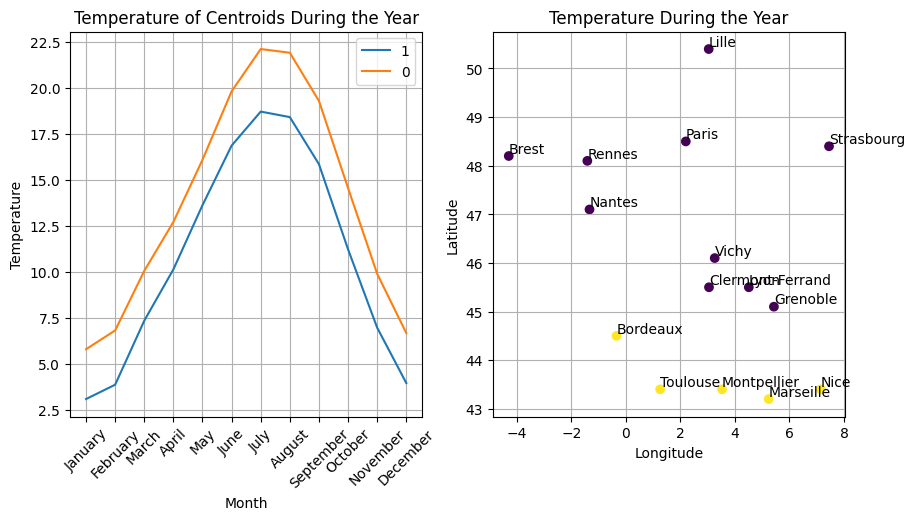

In [53]:
changing_covariance_type("full")

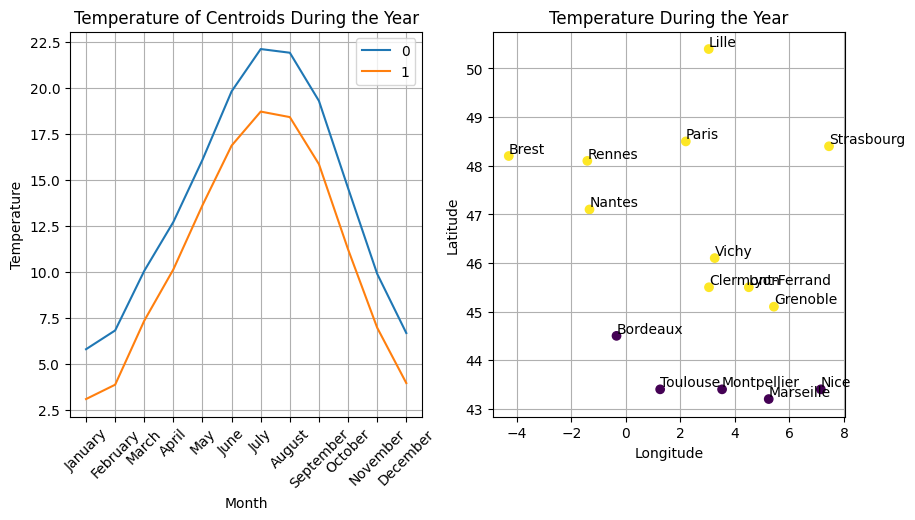

In [54]:
changing_covariance_type("spherical")

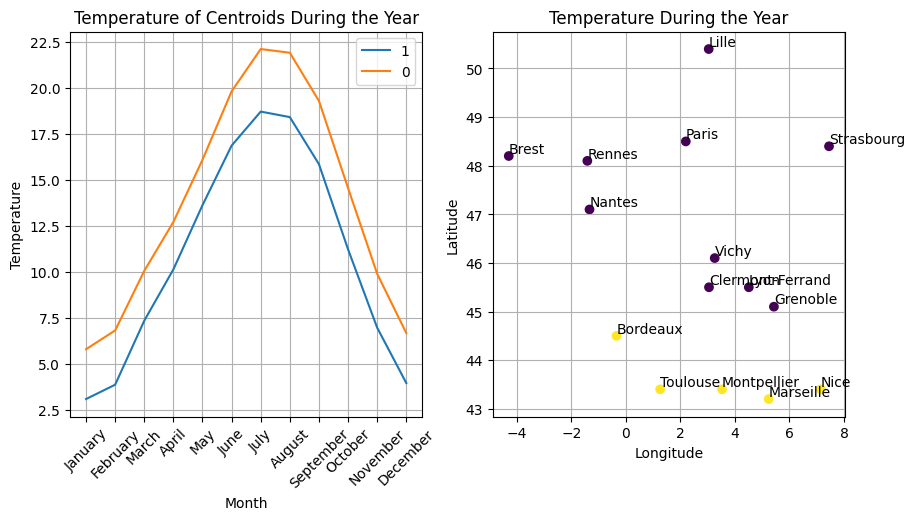

In [55]:
changing_covariance_type("tied")

**Interpretation**

We observe that regardless of the type of covariance matrix chosen, the clustering results and plots remain consistent. This suggests that our dataset exhibits a straightforward structure and does not necessitate complex covariance types. In other words, there is little to no correlation between temperature patterns across the months. As a result, the choice of covariance type does not significantly impact the quality of our clustering, indicating the simplicity and independence of the data in this context.

**Detecting outlieres**

In [56]:
Gmm_temper=GaussianMixture(2,covariance_type="diag")
Gmm_temper.fit(x1)

GaussianMixture(covariance_type='diag', n_components=2)

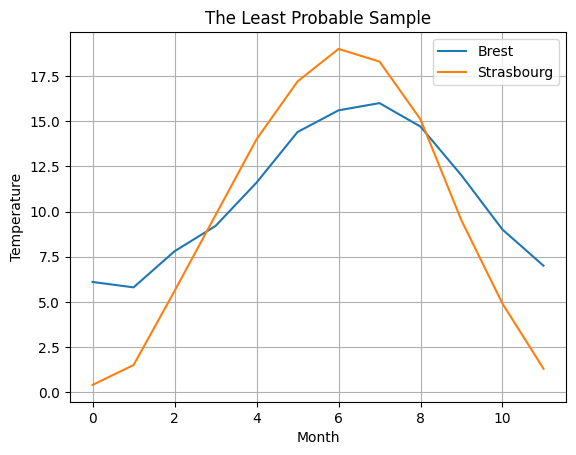

In [57]:
# Number of outliers to identify
n_outlier = 2

# Find the indices of the n_outlier least probable samples
indices = np.argpartition(Gmm_temper.score_samples(x1), n_outlier)[:n_outlier]

# Plot the temperature data for the identified outliers
plt.plot(x1[indices, :].T)

# Add a legend for the cities associated with the outliers
plt.legend(villes[indices])

# Set the title and axis labels for the plot
plt.title("The Least Probable Sample")
plt.xlabel("Month")
plt.ylabel("Temperature")

# Display a grid in the plot
plt.grid(True)

**Interpretation**

The geographical locations of Brest and Strasbourg are notably distant from the rest of the cities, making it reasonable to identify them as outliers.

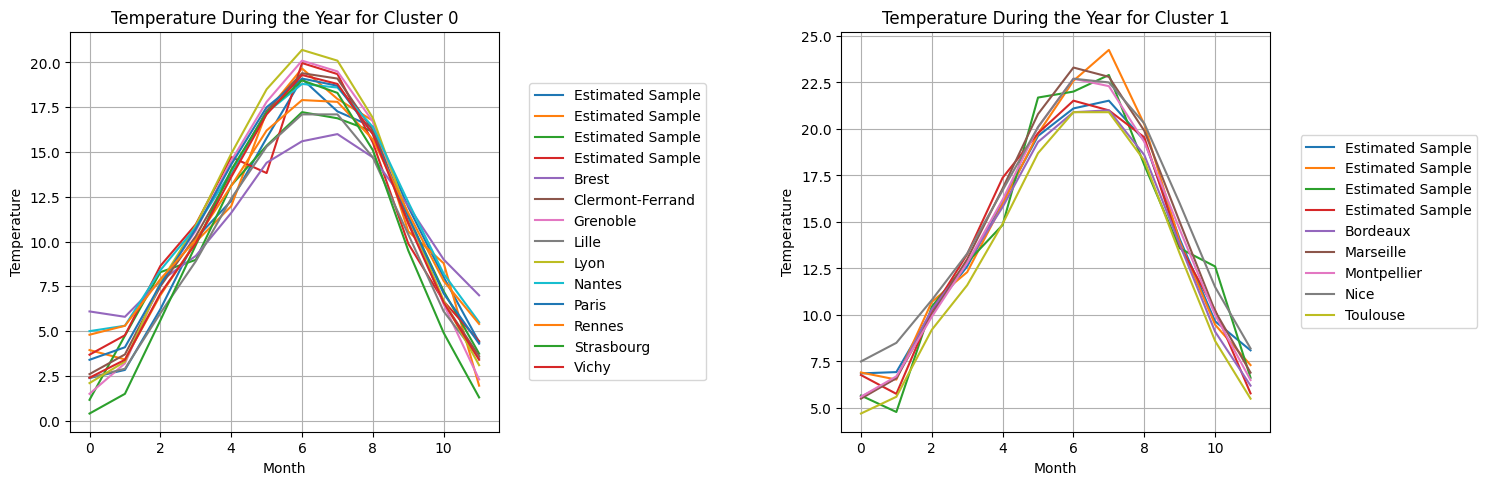

In [58]:
n_sample = 8

# Generate n_sample samples from the Gaussian Mixture Model
x_sample_temper = Gmm_temper.sample(n_sample)

# Create a 1x2 subplot with appropriate spacing
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.4)

for i in range(2):
    # Plot the estimated samples
    ax[i].plot(x_sample_temper[0][x_sample_temper[1] == i].T, label="Estimated Sample")

    # Plot the actual temperature data for the corresponding cluster
    ax[i].plot(x1[Gmm_temper.predict(x1) == i, :].T, label=temper["villes"][Gmm_temper.predict(x1) == i])

    ax[i].set_title(f'Temperature During the Year for Cluster {i}')
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Temperature")

    # Add a legend to the right of the plot
    ax[i].legend(loc="center right", bbox_to_anchor=(1.5, 0.5))

    ax[i].grid(True)


It's evident that we face a challenge in differentiating between the samples generated by the Gaussian mixture and the original dataset. This difficulty arises from the effectiveness of the density estimation process, where the Gaussian mixture has successfully clustered our data. As a result, the generated samples closely resemble the actual data, demonstrating the efficiency of the density estimation and clustering process.

### Digits dataset

In [59]:
Gmm_digits=GaussianMixture(3,covariance_type="diag")
Gmm_digits.fit(x2)

GaussianMixture(covariance_type='diag', n_components=3)

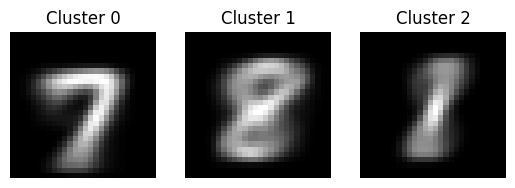

In [60]:
# Create a 1x3 subplot to display cluster centroids
for i in range(3):
    # Define the subplot position within the 1x3 grid
    plt.subplot(1, 3, i + 1)

    # Reshape the mean image of the current cluster to the original shape (28x28 pixels)
    mean_image = Gmm_digits.means_[i].reshape(28, 28)

    # Display the mean image in grayscale
    plt.imshow(mean_image, cmap='gray')

    # Set the title of the subplot to include the cluster number
    plt.title(f'Cluster {i}')
    plt.axis('off')

**Interpretation**

 When examining the results from the Gaussian mixture model, we notice that for cluster 2, the central image doesn't distinctly represent a single digit. This issue could be attributed to our assumption of diagonal covariances. By assuming diagonal covariances, the model may struggle to capture potential correlations between pixel values in the images. As a result, it may not generate a clear representation of a specific digit in this particular cluster.

**Changing the value of K for each Dataset**

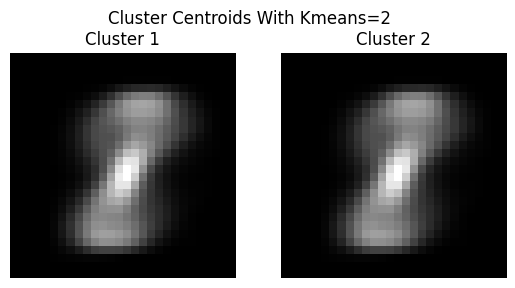

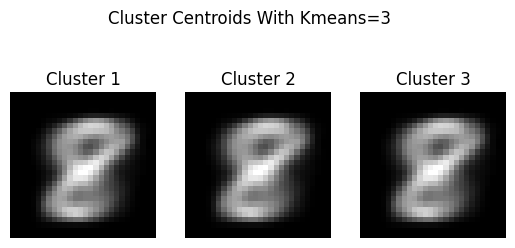

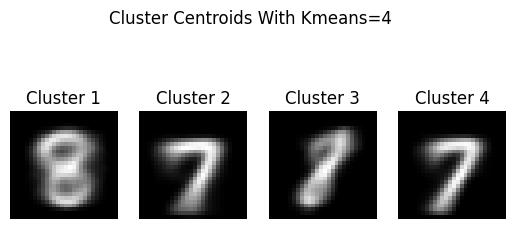

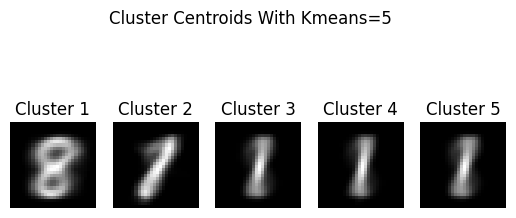

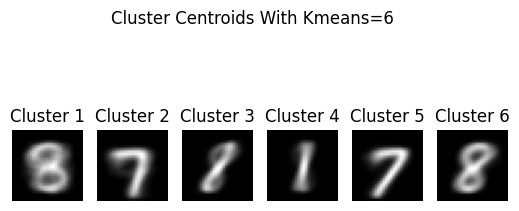

In [61]:
k = 6  # Number of clusters to consider

# Iterate through different numbers of clusters from 2 to k
for i in range(2, k + 1):
    # Create a subplot with 'i' subplots arranged in a row
    fig, ax = plt.subplots(1, i)

    # Set the super title for the entire plot
    plt.suptitle(f'Cluster Centroids With Kmeans={i}')

    # Adjust the spacing for better layout
    plt.subplots_adjust(top=1.2,hspace=0.2)

    # Iterate through clusters within the current K value
    for j in range(i):
        # Create a Gaussian Mixture Model with 'i' clusters and diagonal covariances
        gmm_digits_try = GaussianMixture(i, covariance_type="diag")
        gmm_digits_try.fit(x2)

        # Get the cluster centroids (means)
        gmm_centroids_digits_try = gmm_digits_try.means_

        # Reshape the centroid image to its original 28x28 shape
        centroid_image = gmm_centroids_digits_try[j].reshape(28, 28)

        # Display the centroid image in grayscale
        ax[j].imshow(centroid_image, cmap='gray')

        # Set the title for the current subplot indicating the cluster number
        ax[j].set_title(f'Cluster {j + 1}')

        # Turn off the axis labels to declutter the plot
        ax[j].axis('off')


In [62]:
k = 11  # Number of clusters to consider

# Iterate through different numbers of clusters from 1 to k-1
for i in range(1, k):
    # Create a Gaussian Mixture Model with 'i' clusters and diagonal covariances
    gmm_digits_try = GaussianMixture(i, covariance_type="diag")

    # Fit the model to the digit dataset
    gmm_digits_try.fit(x2)

    # Get the cluster centroids (means)
    gmm_centroids_digits_try = gmm_digits_try.means_

    # Predict the cluster labels for the dataset
    gmm_digits_estimated_labels_try = gmm_digits_try.predict(x2)

    # Calculate and print the adjusted Rand score and Rand score
    ari_score = adjusted_rand_score(y2.reshape(3000,), gmm_digits_estimated_labels_try)
    ri_score = rand_score(y2.reshape(3000,), gmm_digits_estimated_labels_try)
    print(f'The adjusted Rand score for {i}: {ari_score} and the Rand score is for {i}: {ri_score}')

The adjusted Rand score for 1: 0.0 and the Rand score is for 1: 0.33311103701233746
The adjusted Rand score for 2: 0.19022354409288325 and the Rand score is for 2: 0.5824983883516728
The adjusted Rand score for 3: 0.48072606373955995 and the Rand score is for 3: 0.76156474380349
The adjusted Rand score for 4: 0.4114851486365174 and the Rand score is for 4: 0.7533491163721241
The adjusted Rand score for 5: 0.4224106028359999 and the Rand score is for 5: 0.7662120706902301
The adjusted Rand score for 6: 0.4260203273732204 and the Rand score is for 6: 0.772974547071246
The adjusted Rand score for 7: 0.42348687520666517 and the Rand score is for 7: 0.77486162054018
The adjusted Rand score for 8: 0.35465303612028737 and the Rand score is for 8: 0.7538741802823163
The adjusted Rand score for 9: 0.33187813007991723 and the Rand score is for 9: 0.7472888740691341
The adjusted Rand score for 10: 0.36880548934978974 and the Rand score is for 10: 0.7639502056240969


**Interpretation**

Based on our observations and the previous analyses, we find that when the number of clusters (K) is greater than or equal to 4, we are able to discern distinct digits in separate clusters. As a result, the Rand and adjusted Rand scores have improved, although they are still relatively low. It's possible that further enhancements could be achieved by exploring different covariance matrix types to better model the data.

In [63]:
def changing_covariance_type_digits(type_covariance):
    # Create a Gaussian Mixture Model with 3 clusters and the specified covariance type
    Gmm_digits_try = GaussianMixture(3, covariance_type=type_covariance)

    # Fit the model to the digit dataset
    Gmm_digits_try.fit(x2)

    # Plot the cluster centroids for visualization
    for i in range(3):
        plt.subplot(1, 3, i + 1)

        # Get the mean image for the current cluster
        mean_image = Gmm_digits_try.means_[i].reshape(28, 28)

        # Display the mean image in grayscale
        plt.imshow(mean_image, cmap='gray')
        plt.title(f'Cluster {i}')
        plt.axis('off')

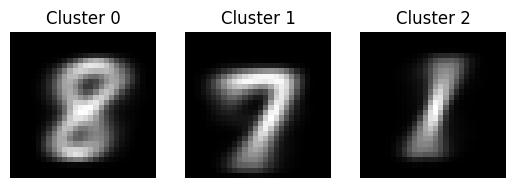

In [64]:
changing_covariance_type_digits("full")

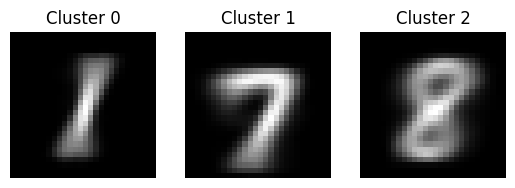

In [65]:
changing_covariance_type_digits("spherical")

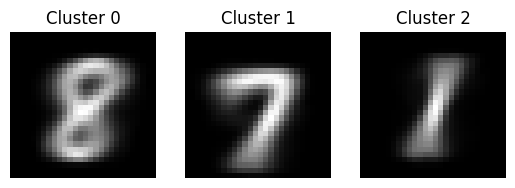

In [66]:
changing_covariance_type_digits("tied")

**Interpretation**

Through our exploration, we've noticed that adjusting the covariance matrix type has led to improved clustering results. This improvement can be attributed to the intricate nature of the images, where pixel values are highly correlated. For our subsequent analysis, we will assume a "full" covariance type.


**Changing K and evaluate the performance**


In [67]:
k=11
for i in range(1,k):
  gmm_digits_try=GaussianMixture(i,covariance_type="full")
  gmm_digits_try.fit(x2)
  gmm_centroids_digits_try=gmm_digits_try.means_
  gmm_digits_estimated_labels_try=gmm_digits_try.predict(x2)
  print(f'the adjusted rand score for {i}:{adjusted_rand_score(y2.reshape(3000,),gmm_digits_estimated_labels_try)} and the rand score is for {i}:{rand_score(y2.reshape(3000,),gmm_digits_estimated_labels_try)}')

the adjusted rand score for 1:0.0 and the rand score is for 1:0.33311103701233746
the adjusted rand score for 2:0.4502107351832281 and the rand score is for 2:0.7138495053906858
the adjusted rand score for 3:0.7427762426809944 and the rand score is for 3:0.8849649883294431
the adjusted rand score for 4:0.6491219886774857 and the rand score is for 4:0.8492055129487607
the adjusted rand score for 5:0.597250166535312 and the rand score is for 5:0.8369809936645548
the adjusted rand score for 6:0.5416561738729092 and the rand score is for 6:0.8147933755696343
the adjusted rand score for 7:0.4450220067196958 and the rand score is for 7:0.7870612426364344
the adjusted rand score for 8:0.39734087334898754 and the rand score is for 8:0.7733822385239524
the adjusted rand score for 9:0.3582544873996689 and the rand score is for 9:0.7620798043792375
the adjusted rand score for 10:0.33594755913725716 and the rand score is for 10:0.7555251750583528


**Interpretation**

Upon experimenting with different covariance types, including full covariance, and varying the value of K, we have observed that the optimal K value is similar to that of K-means, which is 3. This choice aligns with our dataset, consisting of 3 distinct digits, thereby requiring 3 separate clusters for effective classification.

In [68]:
Gmm_digits=GaussianMixture(3,covariance_type="full")
Gmm_digits.fit(x2)

GaussianMixture(n_components=3)

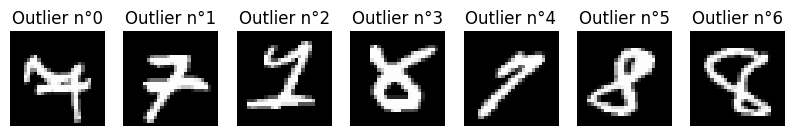

In [69]:
# Define the number of outliers to be selected
n_outlier = 7

# Find the indices of the lowest probability samples using GMM score_samples
indices_digits = np.argpartition(Gmm_digits.score_samples(x2), n_outlier)[:n_outlier]

# Create a figure with subplots for each outlier
fig, ax = plt.subplots(1, n_outlier, figsize=(10, 5))

# Plot each outlier sample
for i in range(n_outlier):
    ax[i].imshow(x2[indices_digits[i], :].reshape(28, 28), cmap="gray")
    ax[i].axis("off")
    ax[i].set_title(f"Outlier n°{i}")

# Display the outliers
plt.show()

**Interpretation:**

In the displayed outliers, we observe that the digit "8" is not well-aligned, which makes it challenging for the model to distinguish between "8," "7," and "1." This confusion arises from the presence of many common pixels shared between these digits, resulting in a low probability score for these outlier samples.

In [70]:
y_predict=Gmm_digits.predict(x2)
print(f'the adjusted rand score for :{adjusted_rand_score(y2.reshape(3000,),y_predict)} and the rand score is for :{rand_score(y2.reshape(3000,),y_predict)}')

the adjusted rand score for :0.7478594247125229 and the rand score is for :0.8872766477714794


We have GMM have score better than Kmeans wich is due to the fact Gaussian Mixture Models (GMM) are more flexible and capable of modeling complex data distributions because they don't make strong assumptions about the shape, size, and orientation of clusters. They work well when clusters in the data have different shapes and variances. This flexibility often allows GMM to outperform K-Means in scenarios where data is complex and doesn't fit neatly into spherical clusters, which can lead to the observed difference in performance between GMM and K-Means.

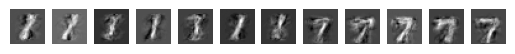

In [71]:
n_sample=8
x_sample=Gmm_digits.sample(n)
# Create a row of 8 subplots for displaying mean images
for i in range(n):
    plt.subplot(1, n, i + 1)  # Create a subplot within the row
    mean_image = x_sample[0][i,:].reshape(28, 28)  # Reshape and retrieve a mean image
    plt.imshow(mean_image, cmap='gray')  # Display the mean image in grayscale
    plt.axis('off')  # Turn off axis labels and ticks

**Interpretation**

 The Gaussian Mixture Model (GMM) shows its sensitivity to outliers, which allows us to distinguish these outlier samples from the original data. As a result, the model effectively reproduces the images of these outliers.

##Linear Projection

### Linear Projection with temperature dataset

In [72]:
pca_temper = PCA(n_components=None)
pca_temper.fit(x1)

PCA()

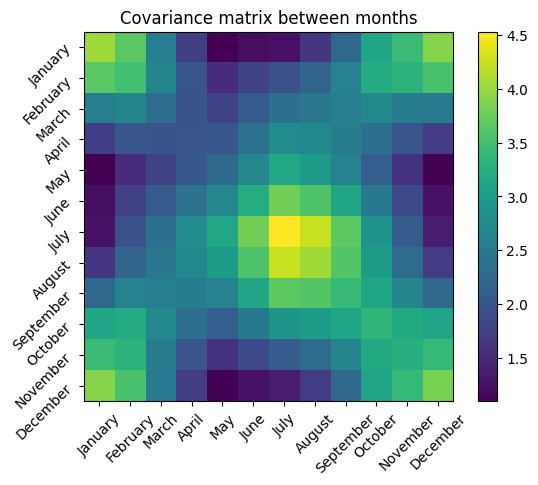

In [73]:
# Display the covariance matrix of the transposed x1 data
plt.imshow(np.cov(x1.T))

# Add a color bar to the plot
plt.colorbar()

# Set the title of the plot
plt.title("Covariance matrix between months")

# Set the x-axis ticks with month names and rotate them for readability
plt.xticks(list(range(0,12)), months.tolist(), rotation=45)

# Set the y-axis ticks with month names and rotate them for readability
plt.yticks(list(range(0,12)), months.tolist(), rotation=45)

# Show the plot
plt.show()

**Interpretation**

We observe a clear pattern in the covariance matrix, indicating a positive correlation between months within the same season. For example, the summer months (June to August) are characterized by higher temperatures, and we can see a strong positive correlation among them (from month 6 to month 8). This pattern holds for other seasons as well, where months with similar temperature characteristics exhibit positive correlations. The covariance matrix effectively captures these seasonal relationships within the dataset.

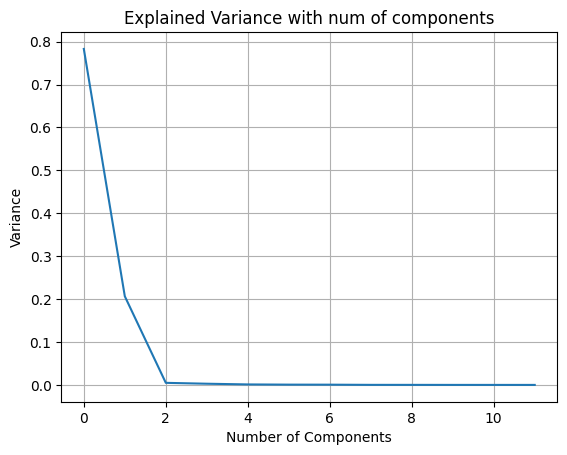

In [74]:
# Plot the explained variance ratio for each principal component
plt.plot(pca_temper.explained_variance_ratio_)

# Set the title and axis labels for the plot
plt.title("Explained Variance with num of components")
plt.xlabel("Number of Components")
plt.ylabel("Variance")

# Display a grid for better visualization
plt.grid(True)

**Interpretation**

From this figure, we can infer that projecting the data into two dimensions retains and preserves the entirety of the information within the dataset.

In [75]:
pca_temper_two=PCA(n_components=2)

pca_temper_two.fit(x1)

PCA(n_components=2)

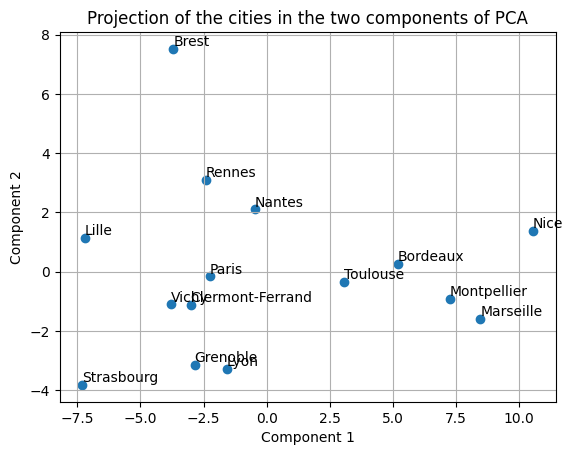

In [76]:
# Apply PCA transformation
X_transformed = pca_temper_two.transform(x1)

# Create a scatter plot of the transformed data
plt.scatter(X_transformed.T[0, :], X_transformed.T[1, :])

# Set the plot title
plt.title("Projection of the cities in the two components of PCA")

# Label cities on the plot
for i, city in enumerate(temper["villes"]):
    plt.text(X_transformed[i][0], X_transformed[i][1], city, fontsize=10, ha='left', va='bottom')

# Set X and Y axis labels
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Enable grid lines on the plot
plt.grid(True)


**Interpretation**

The PCA analysis successfully retains the geographical characteristics of cities, resulting in a clear clustering pattern. It becomes evident that cities located in close geographical proximity exhibit similar projection components. This observation indicates that our data is linearly separable.

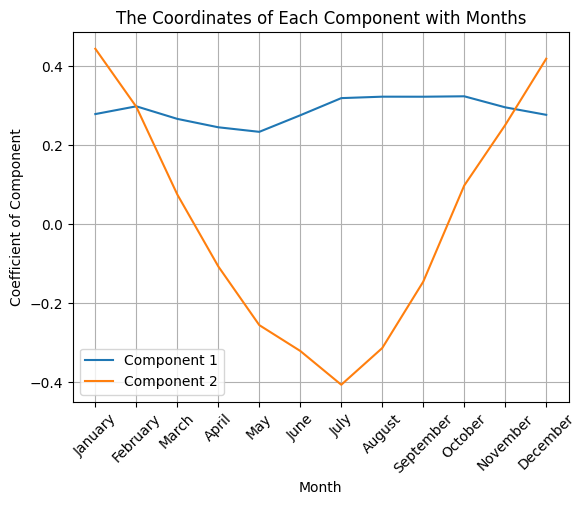

In [77]:

# Plot the coefficients of Component 1 and Component 2 with respect to months
plt.plot(pca_temper_two.components_.T, label=["Component 1", "Component 2"])
plt.xlabel("Month")
plt.ylabel("Coefficient of Component")
plt.xticks(list(range(0, 12)), months.tolist(), rotation=45)
plt.title("The Coordinates of Each Component with Months")
plt.legend()
plt.grid(True)

**Interpretation**

In this figure, we can discern that Component 1 predominantly represents lower temperatures. This is evident as it exhibits positive coefficients from October to March, coinciding with the colder months, and negative coefficients during the summer months from April to September, signifying warm weather. Conversely, Component 2 demonstrates positive coefficients for most months, with a slightly higher coefficient during the summer season, indicating a focus on higher temperatures.

In summary, Component 1 captures information related to colder weather and lower temperatures, while Component 2 emphasizes warmer weather, enabling us to represent the full spectrum of temperature variations.

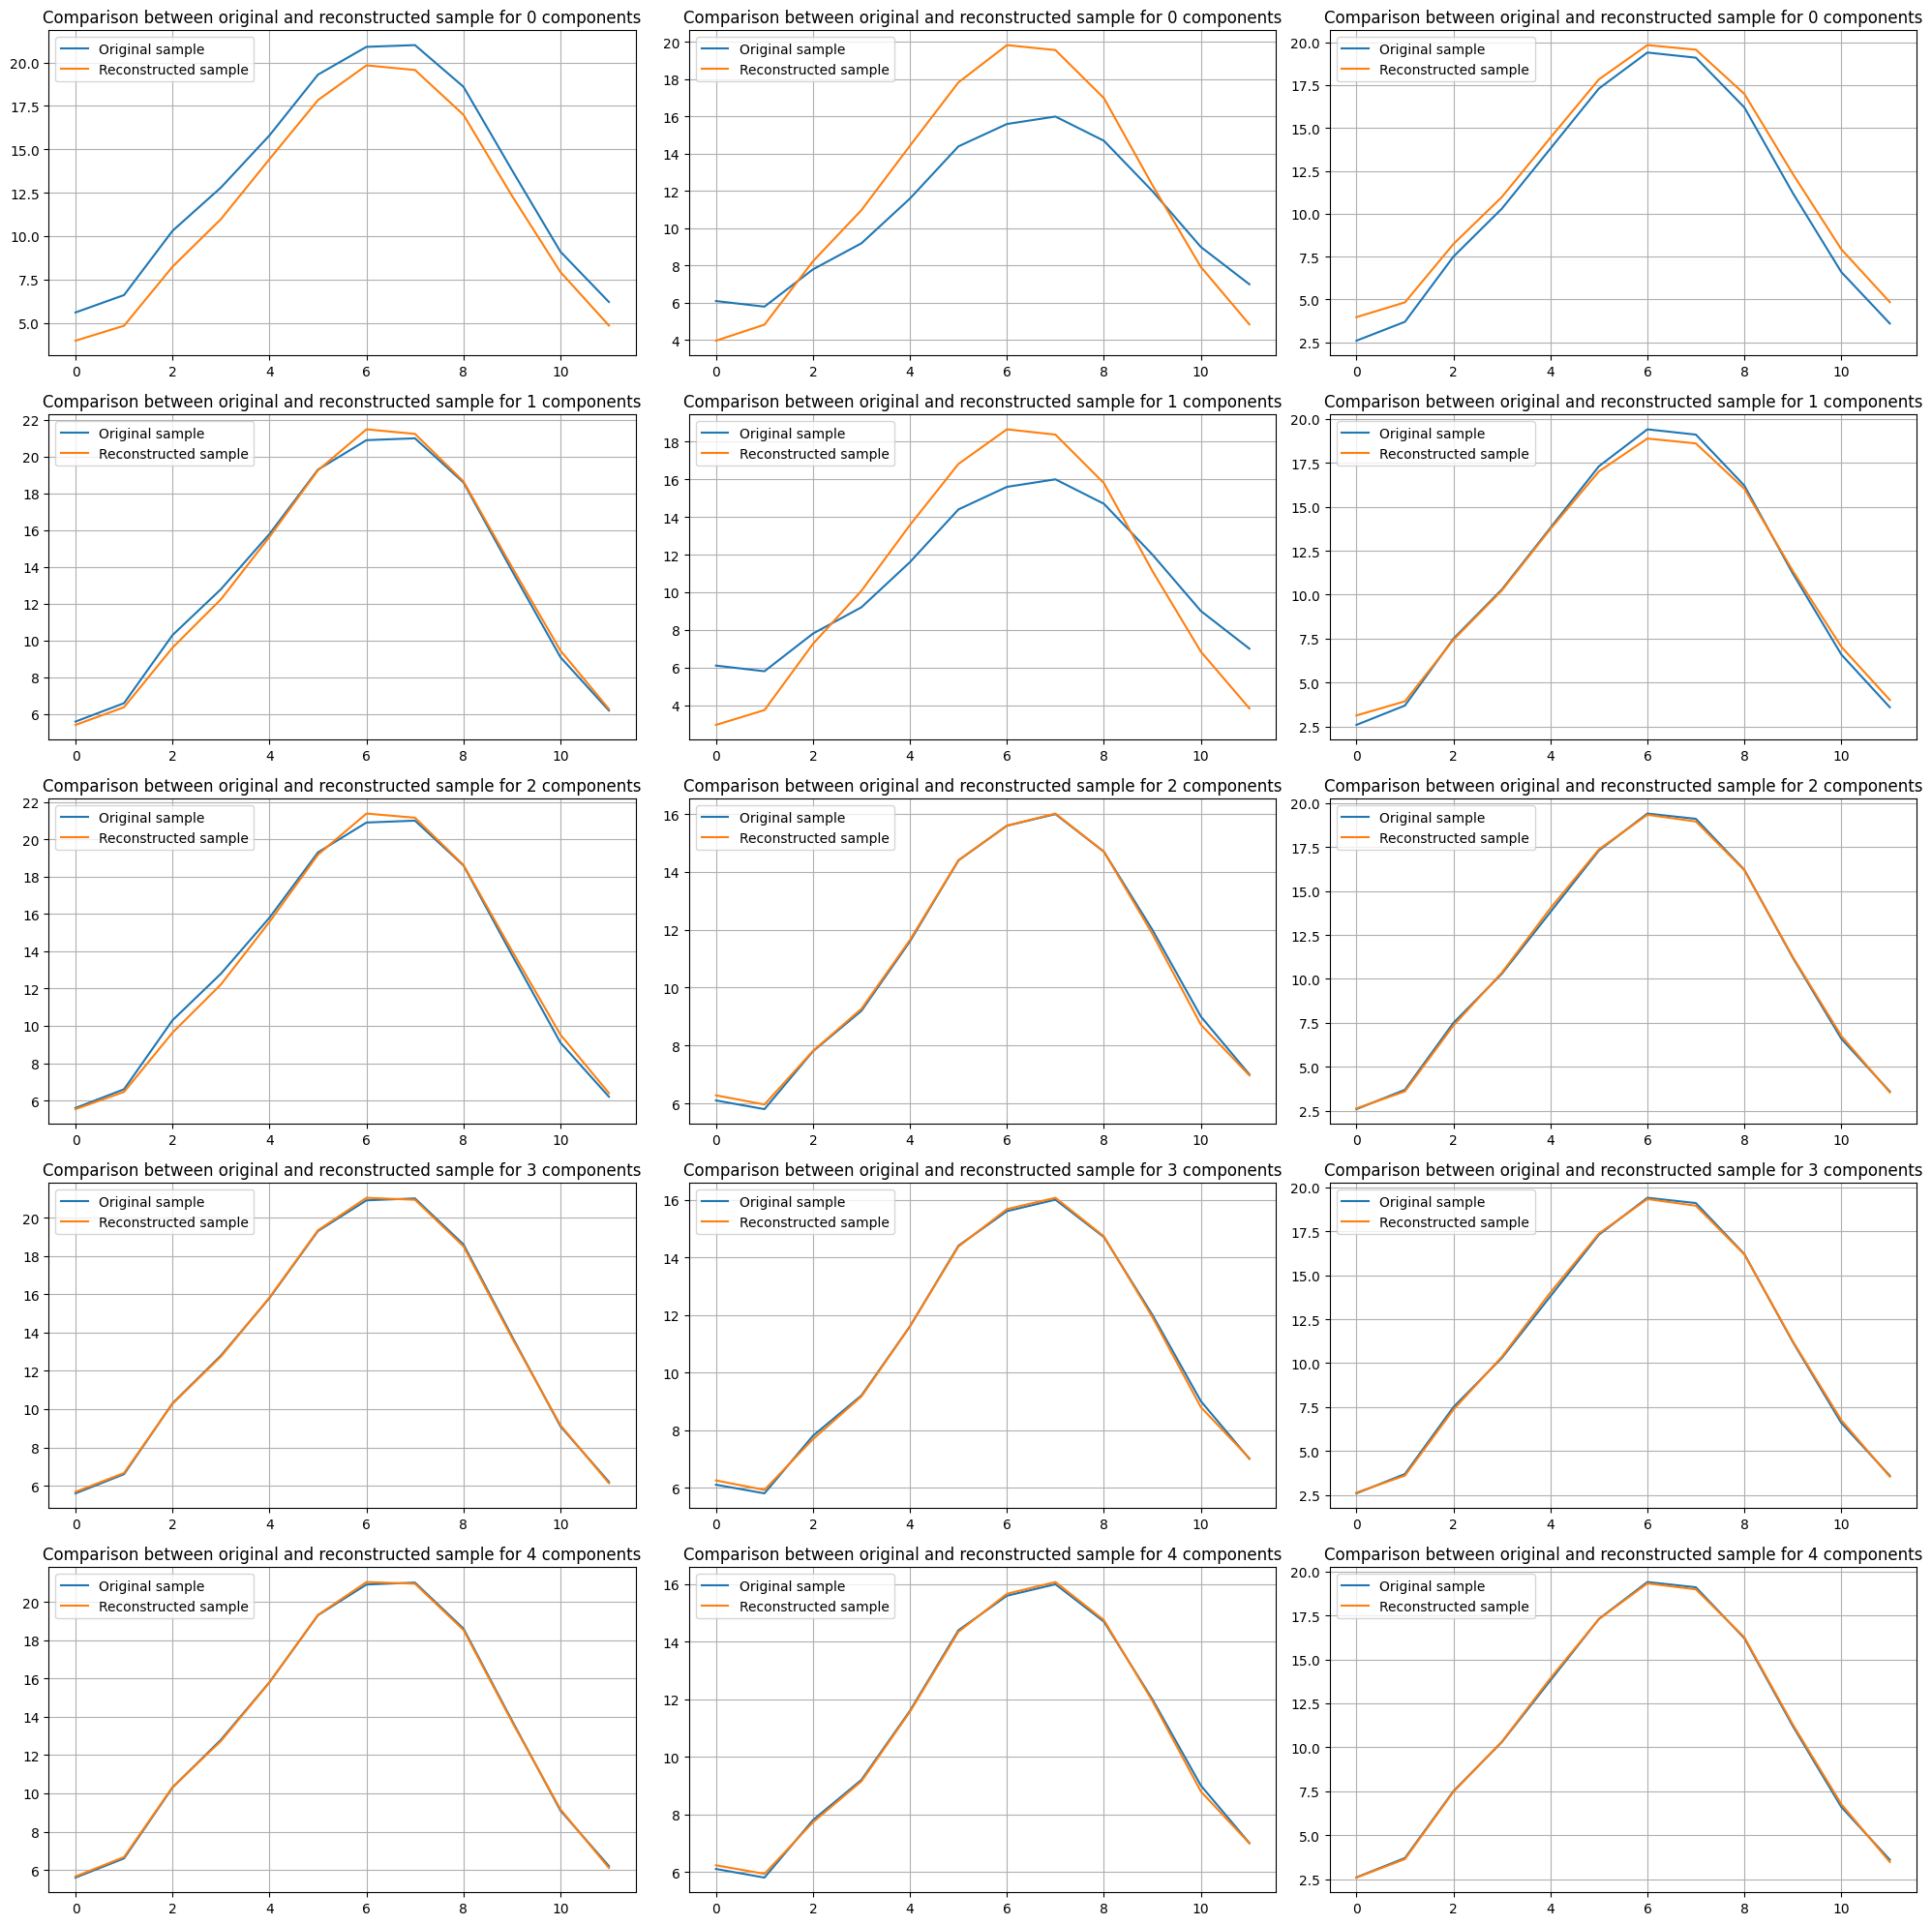

In [133]:
n = 5
k = 3

# Create subplots for the comparison
fig, ax = plt.subplots(n, k, figsize=(20,20))
plt.subplots_adjust(wspace=0.6)

# Iterate over the number of components (n)
for j in range(n):
    # Create a PCA instance with j components
    pca_temper_try = PCA(n_components=j)

    # Transform the original data
    X_transformed = pca_temper_try.fit_transform(x1)

    # Inverse transform to reconstruct the samples
    X_original = pca_temper_try.inverse_transform(X_transformed)

    # Iterate over the number of samples (k)
    for i in range(k):
        # Plot the original sample
        ax[j, i].plot(x1[i, :], label="Original sample")

        # Plot the reconstructed sample
        ax[j, i].plot(X_original[i, :], label="Reconstructed sample")

        # Set the title for the subplot
        ax[j, i].set_title(f"Comparison between original and reconstructed sample for {j} components")

        # Add a legend
        ax[j, i].legend()
        ax[j, i].grid(True)
        plt.tight_layout()

# Display the subplots

plt.show()


**Interpretation**

We observe that we can accurately reconstruct our original samples when the number of components is equal to or greater than 2. This suggests that only two components are necessary to capture and retain the essential information.

**Other Linear model approach(NMF)**

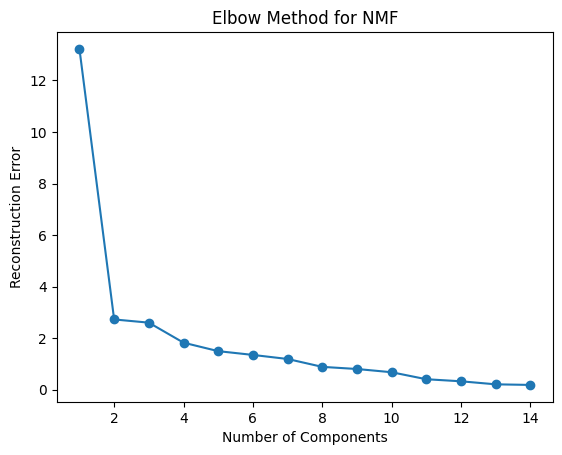

In [79]:
n_components_range = range(1, 15)

# Calculate the explained variance for each component value
explained_variance = []
for n in n_components_range:
    nmf = NMF(n_components=n, init='random', random_state=0)
    nmf.fit(x1)
    explained_variance.append(nmf.reconstruction_err_)

# Plot the explained variance against the number of components
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Elbow Method for NMF')
plt.show()

**Interpretation**

For n_components greater than or equal to 2, the reconstruction error is minimized. Therefore, we can set the number of components to 2 for optimal results.

In [80]:
nmf_temper= NMF(n_components=2)
nmf_temper.fit(x1)

NMF(n_components=2)

In [81]:
H=nmf_temper.components_
W=nmf_temper.fit_transform(x1)

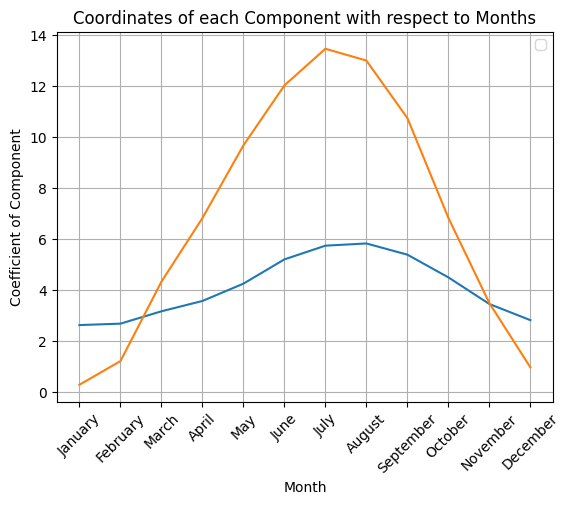

In [82]:
# Plot the transposed matrix H
plt.plot(H.T)

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Coefficient of Component")
plt.xticks(list(range(0, 12)), months.tolist(), rotation=45)
plt.title("Coordinates of each Component with respect to Months")

# Add a legend if necessary
plt.legend()

# Display the grid
plt.grid(True)
plt.show()

**Interpretation**

This observation highlights the presence of a specific component with substantial coefficients during the summer months, indicating its emphasis on capturing countries with hot temperatures. In contrast, another component appears to regulate temperature and capture cooler weather.

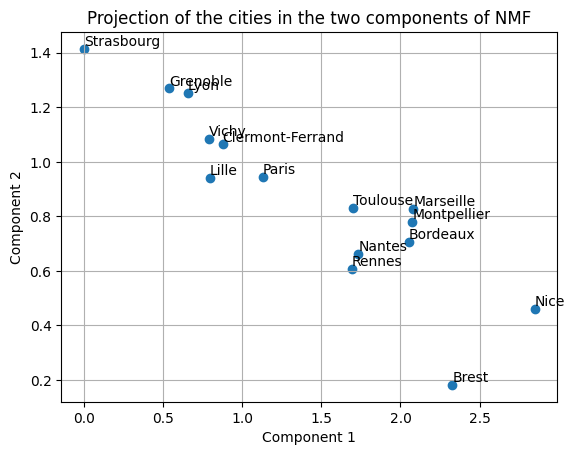

In [83]:
plt.scatter(W.T[0],W.T[1])
plt.title("Projection of the cities in the two components of NMF")
for i, city in enumerate(temper["villes"]):
    plt.text(W[i][0],W[i][1], city, fontsize=10, ha='left', va='bottom')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)


**Interpretation**

The results clearly demonstrate that our projection is inclined to capture geographical aspects, particularly resembling the longitude and latitude of locations. This is evident through the two principal components, which exhibit a stronger correlation with temperature and, consequently, correspond to geographical positions.

**Changing K and compare sampled and reconstructed for NMF**

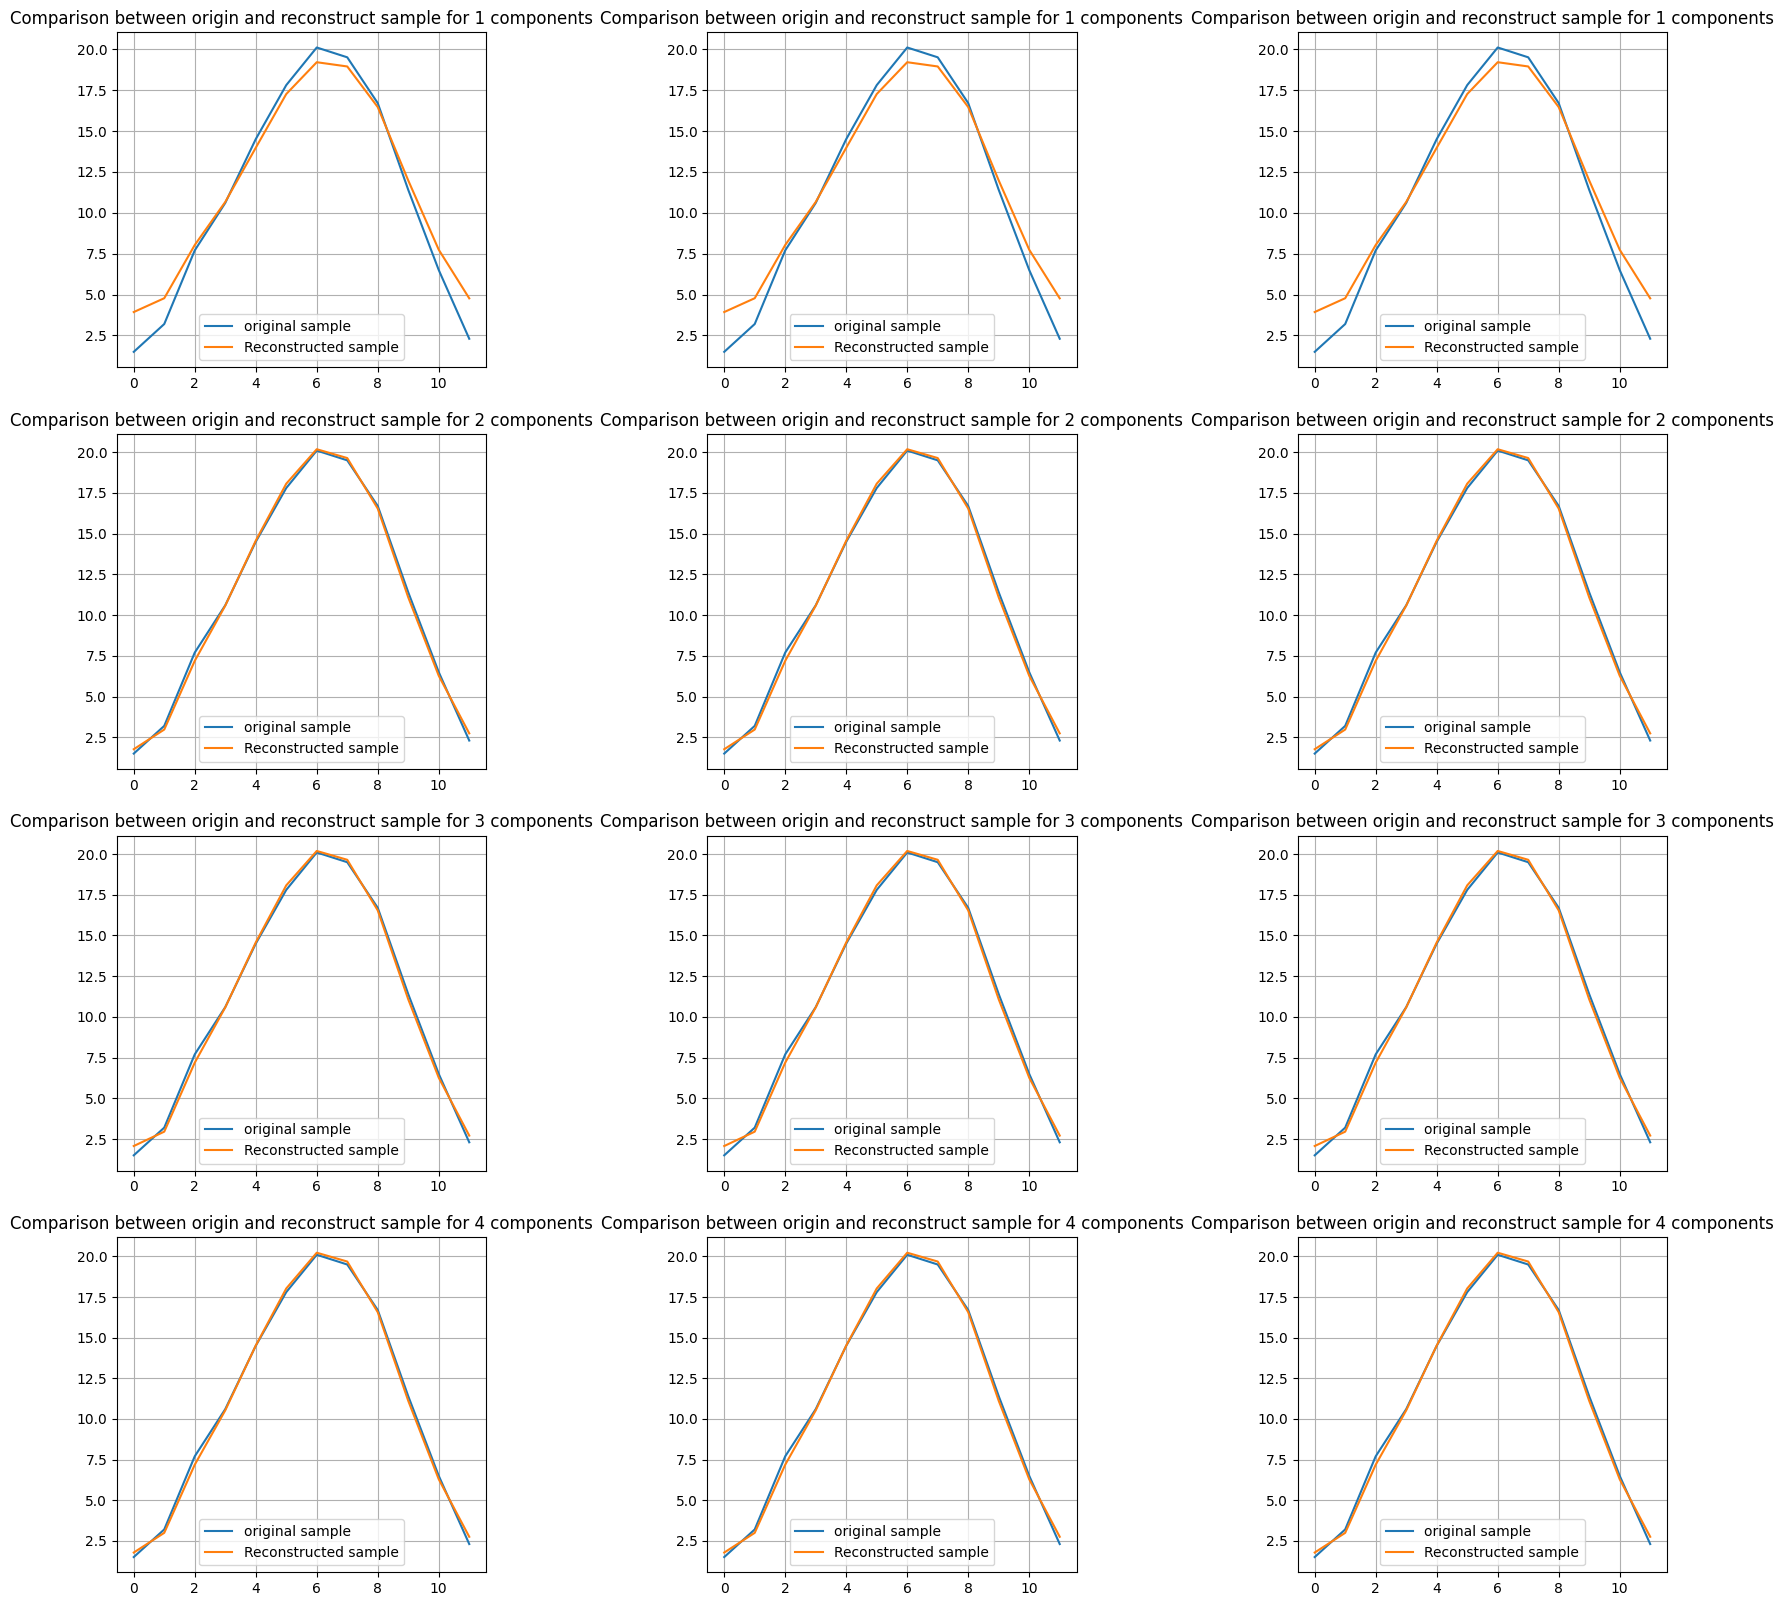

In [134]:
n=5
k=3

fig,ax=plt.subplots(n-1,k,figsize=(20,20))
plt.subplots_adjust(wspace=0.6)
for j in range(1,n):
  nmf_temper_try=NMF(n_components=j)
  X_transformed=nmf_temper_try.fit_transform(x1)
  X_original=nmf_temper_try.inverse_transform(X_transformed)
  for i in range(k):
    ax[j-1,i].plot(x1[k,:],label="original sample")
    ax[j-1,i].plot(X_original[k,:],label="Reconstructed sample")
    ax[j-1,i].set_title(f"Comparison between origin and reconstruct sample for {j} components")
    ax[j-1,i].legend()
    ax[j-1,i].grid(True)


**Interpretation**

For the number of components equal to or greater than 2, we have effectively reconstructed our samples by performing the reverse transformation. This success in reconstruction is attributed to the preservation of information when using two or more components.

### Linear projection Digits Data set

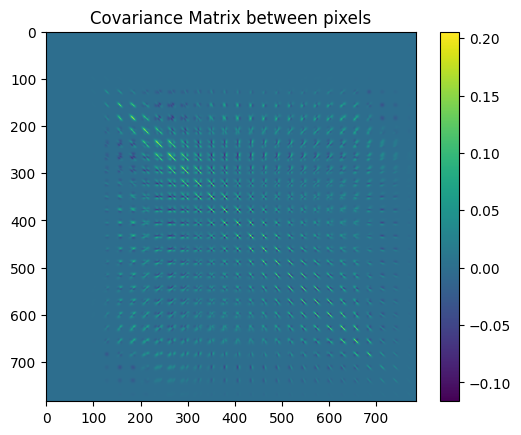

In [85]:
# Plot the covariance matrix between pixels
plt.imshow(np.cov(x2.T))
plt.colorbar()  # Add a color bar to the plot
plt.title("Covariance Matrix between pixels")
plt.show()  # Display the heatmap

**Interpretation**

In this context, the observed correlation between pixels is quite logical. This correlation arises from the need to combine various pixels to form a clear image of a single digit. Consequently, the cluster distinction was not as apparent when we employed density estimation with diagonal covariance, as it neglected the interdependencies among pixels.

In [86]:
pca_digits=PCA(n_components=None)
pca_digits.fit(x2)

PCA()

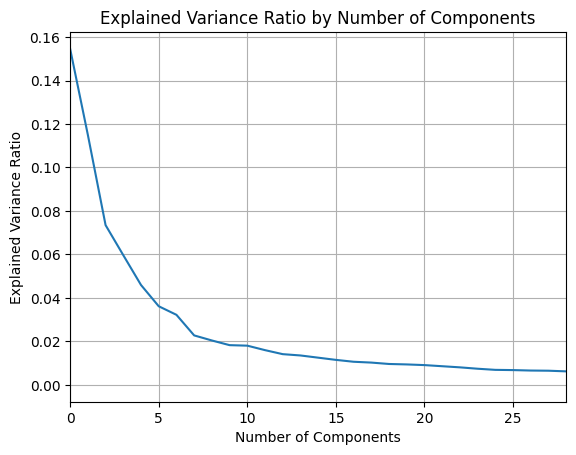

In [87]:
# Extract the explained variance ratio for each component
explained_variance_ratio = pca_digits.explained_variance_ratio_

# Create the plot
plt.plot(explained_variance_ratio)
plt.xlim((0, 28))  # Limit the x-axis to a reasonable range, in this case, from 0 to 28.
plt.title("Explained Variance Ratio by Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)  # Add grid lines for better visualization.
plt.show()

**Interpretation**
As the number of components increases, we notice a decreasing trend in the explained variance. This phenomenon suggests that, in the case of the digits dataset,if we project in two dimensions we can have the information of the digit .


**Projection**

In [88]:
pca_digits_two=PCA(n_components=2)
pca_digits_two.fit(x2)

PCA(n_components=2)

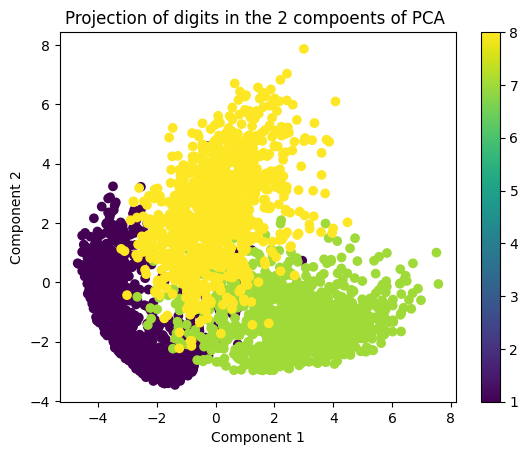

In [89]:
scatter=plt.scatter(pca_digits_two.transform(x2).T[0],pca_digits_two.transform(x2).T[1],c=y2)
plt.title("Projection of digits in the 2 compoents of PCA ")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

**Interpretation**

In the projection of the digits dataset into two dimensions, it's evident that the classes become entangled, making classification challenging. However, we can differentiate between them by examining the coordinates of each example. When component 1 is positive and component 2 is negative, it's likely a digit '7.' If component 1 is positive and component 2 is also positive, it's more likely to be '8.' In the remaining cases, it's typically '1'.

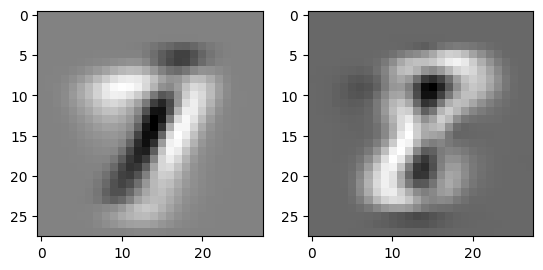

In [90]:
  for i in range(pca_digits_two.components_.shape[0]):
    plt.subplot(1,2,i+1)
    plt.imshow(pca_digits_two.components_[i,:].reshape(28,28),cmap="gray")


**interpretation**

In our analysis, we observed that the two components of the PCA represent distinct patterns in the images. When we move in the direction of the first component positively, we are likely to encounter the digit '1', whereas a negative direction often corresponds to the digit '7'. Similarly, for the second component, moving in the positive direction is associated with the digit '1', while moving negatively tends to result in the digit '8'.

The projection of the digits in the figure further illustrates these relationships. If the first component is greater than zero and the second component is negative, we are more likely to encounter the digit '8'. Conversely, when the first component is positive and the second component is also positive, the digit is often '7'. In the remaining case, we generally find the digit '1'.

This analysis highlights how the principal components capture distinctive features and patterns within the data, allowing us to make informed predictions based on their values.

**Changing K and compare reconstructed and sample for PCA**

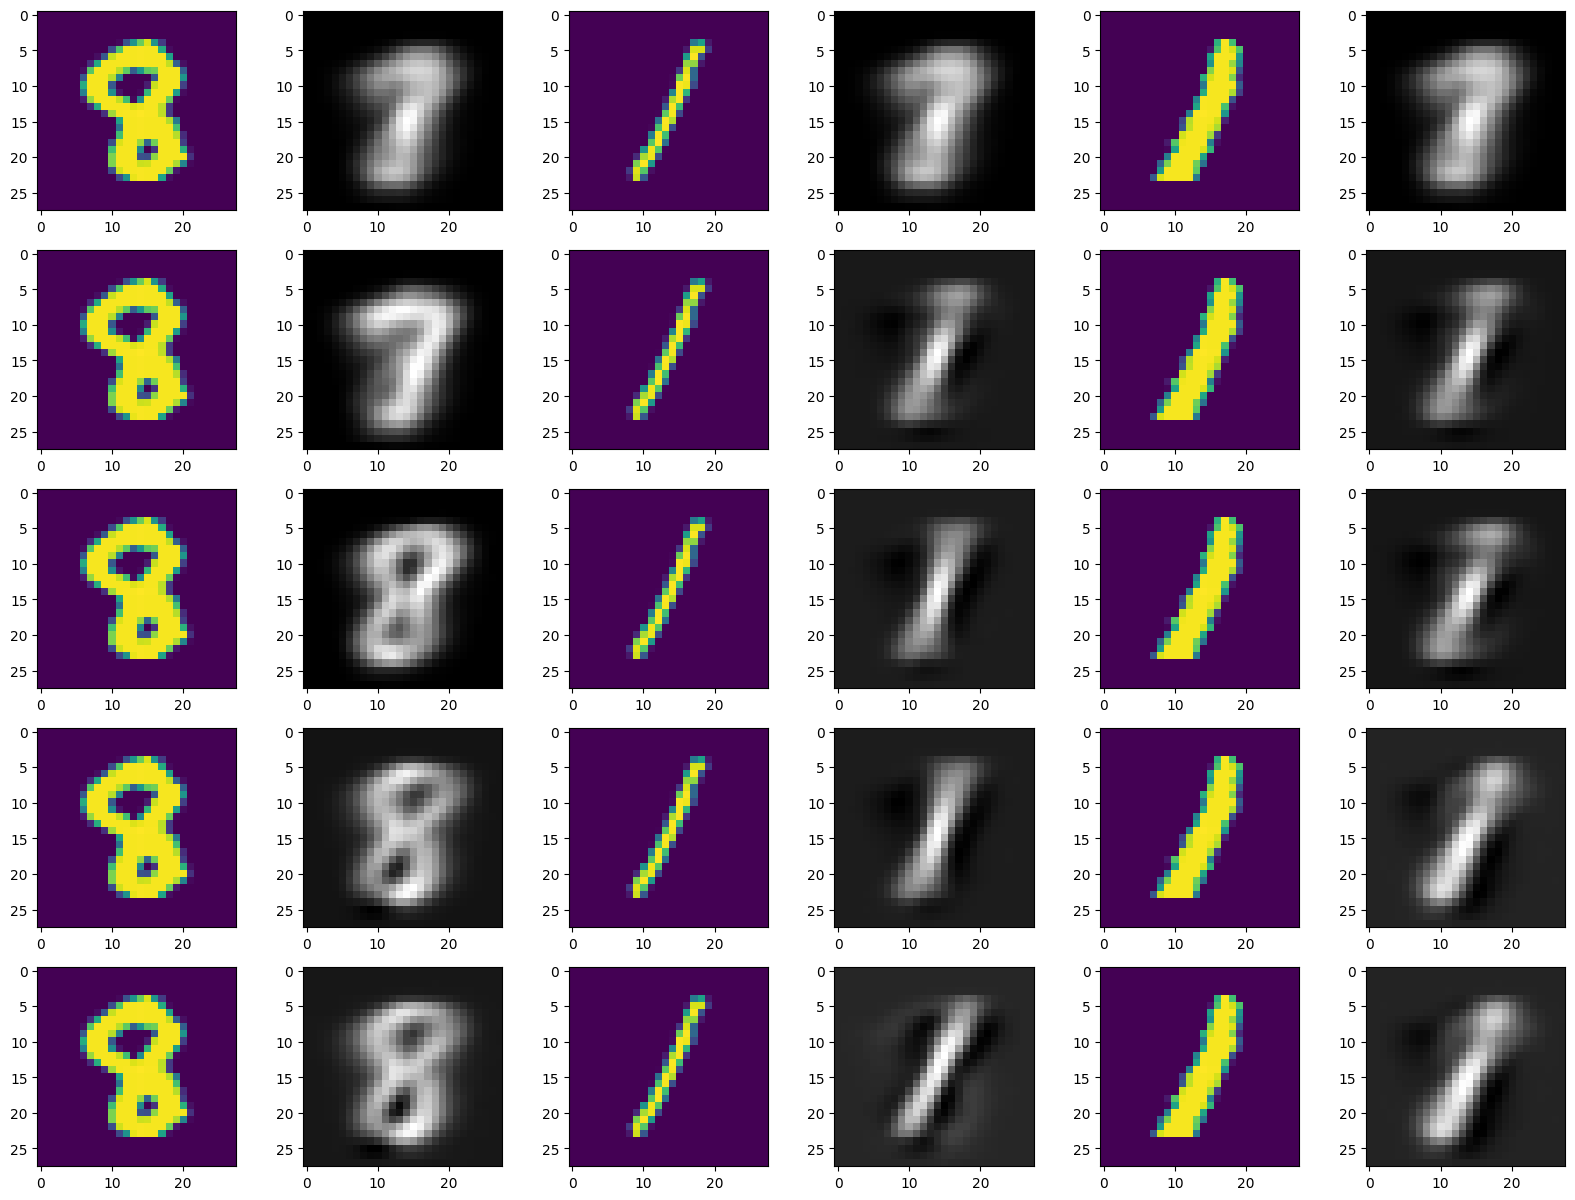

In [112]:


# Define the number of principal components to consider (n) and the number of randomly selected samples (k).
n = 5
k = 3
# Randomly select k indices from the dataset x2 without replacement.
selected_indices = np.random.choice(len(x2), k, replace=False)

# Create a subplot with n rows and k*2 columns for visualizing original and reconstructed images.
fig, ax = plt.subplots(n, k * 2, figsize=(20, k * n))

# Loop through different numbers of principal components (n).
for j in range(n):
  # Create a PCA object with the current number of components (j).
  pca_digits_try = PCA(n_components=j)

  # Fit and transform the dataset using PCA with j components.
  X_transformed = pca_digits_try.fit_transform(x2)

  # Inverse transform the transformed data to obtain reconstructed images.
  X_original = pca_digits_try.inverse_transform(X_transformed)

  # Loop through the randomly selected indices.
  for i, k in enumerate(selected_indices):
      # Set the positions for the original and reconstructed images.
      h = 2 * i + 1
      l = 2 * i

      # Plot the original image in the left column with a label indicating the number of components.
      ax[j, l].imshow(x2[k, :].reshape(28, 28), label="Original sample\n(j={})".format(j), cmap="viridis")

      # Plot the reconstructed image in the right column with a label.
      ax[j, h].imshow(X_original[k, :].reshape(28, 28), label="Reconstructed sample", cmap="gray")

# Display the subplot containing original and reconstructed images.
plt.show()


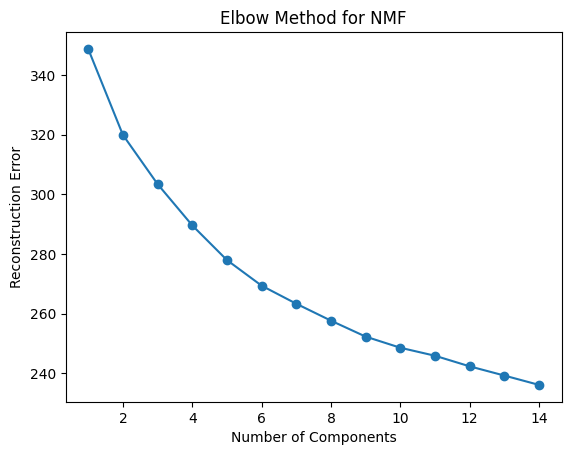

In [92]:
n_components_range = range(1, 15)

# Calculate the explained variance for each component value
explained_variance = []
for n in n_components_range:
    nmf = NMF(n_components=n, init='random', random_state=0)
    nmf.fit(x2)
    explained_variance.append(nmf.reconstruction_err_)

# Plot the explained variance against the number of components
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Elbow Method for NMF')
plt.show()

**Interpretation**

As we increase the number of components in our PCA analysis, we observe a decrease in the reconstruction error. However, it's important to note that not all figures can be reproduced with absolute clarity. The complexity of the digits dataset, with its intricate variations, and the fact that the dataset is not linearly separable naturally contribute to this phenomenon. In practical terms, this means that while PCA can capture and represent many aspects of the data, it may not perfectly reconstruct every detail of the original images due to the inherent complexities within the dataset.

**NMF FOR DIGIT dataset**

In [93]:
nmf_digits= NMF(n_components=2)
nmf_digits.fit(x2)
H=nmf_digits.components_
W=nmf_digits.fit_transform(x2)


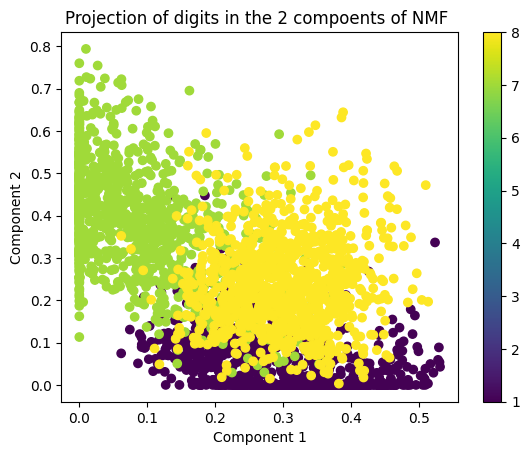

In [94]:
scatter=plt.scatter(W.T[0],W.T[1],c=y2)
plt.title("Projection of digits in the 2 compoents of NMF ")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

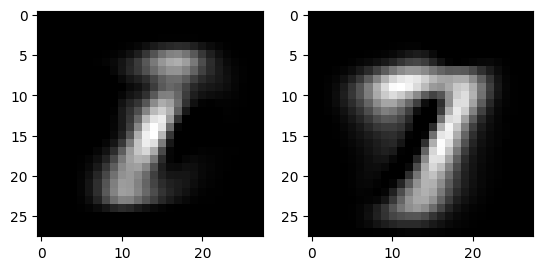

In [95]:
for i in range(H.shape[0]):
    plt.subplot(1,2,i+1)
    plt.imshow(H[i,:].reshape(28,28),cmap="gray")

**Interpretation**

Our projection of the samples does not yield a distinct, clear separation between the digits, and it's evident that the digits appear to overlap and interfere with one another. This phenomenon is a direct result of the intrinsic nature of our dataset, which is inherently not linearly separable. This non-linearity arises because the digits in the dataset are complex combinations of pixels, making it challenging to achieve a straightforward separation between them. Furthermore, it's important to emphasize that the components derived from our analysis do not individually or definitively define any particular number, further highlighting the intricate and overlapping nature of the data.

**Changing the number of components and see the difference in the reconstruction**

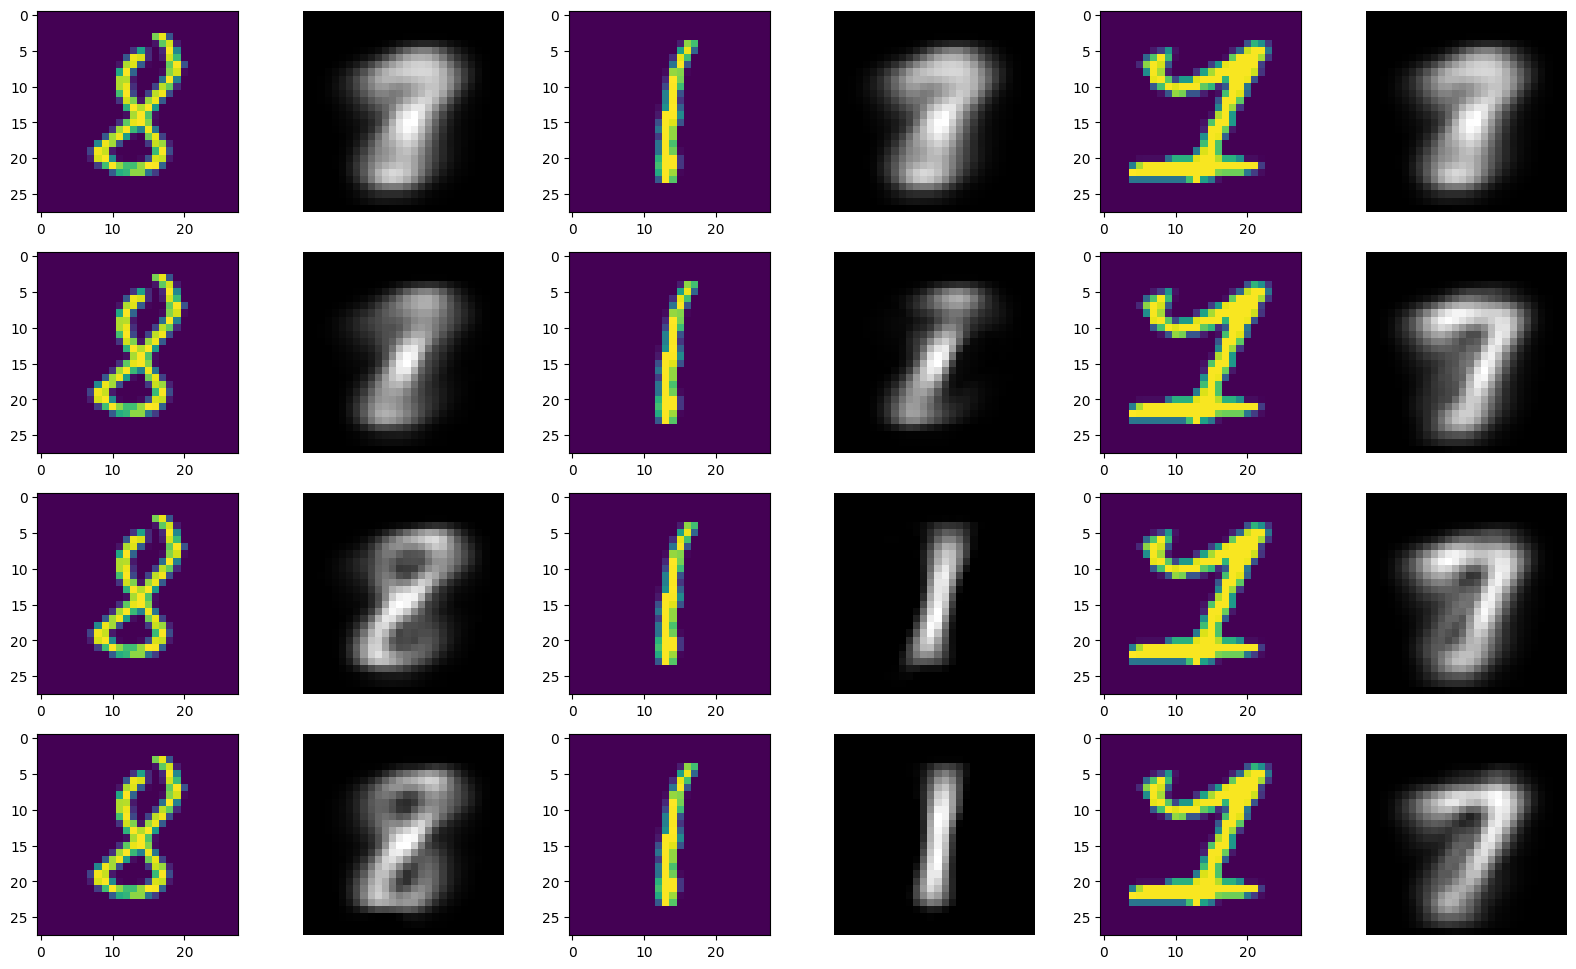

In [138]:


# Define the number of components (n) and the number of randomly selected samples (k).
n = 5
k = 3

# Randomly select k indices from the dataset x2 without replacement.
selected_indices = np.random.choice(len(x2), k, replace=False)

# Create a subplot with (n-1) rows and k*2 columns for visualizing original and reconstructed images.
# Removed the first empty row (j=0).
fig, ax = plt.subplots(n-1, k * 2, figsize=(20, k * (n-1)))

# Loop through different numbers of components from 1 to (n-1).
for j in range(1, n):
    # Create an NMF object with the current number of components (j).
    nmf_digits_try = NMF(n_components=j)

    # Fit and transform the dataset using NMF with j components.
    X_transformed = nmf_digits_try.fit_transform(x2)

    # Reconstruct the data using the transformed data.
    X_original = nmf_digits_try.inverse_transform(X_transformed)

    # Loop through the randomly selected indices.
    for i, k in enumerate(selected_indices):
        # Set the positions for the original and reconstructed images.
        h = 2 * i + 1
        l = 2 * i

        # Plot the original image in the left column.
        ax[j-1, l].imshow(x2[k, :].reshape(28, 28), label="Original sample", cmap="viridis")

        # Plot the reconstructed image in the right column.
        ax[j-1, h].imshow(X_original[k, :].reshape(28, 28), label="Reconstructed sample", cmap="gray")
        ax[j-1, h].axis("off")
# Display the subplot containing original and reconstructed images.
plt.show()


**Interpretation**

The limitations of NMF in accurately reconstructing digit samples, as explained below, can be attributed to its suboptimal performance in efficiently reconstructing the samples even we increase the components but this not deny the fact that the reconstruction improves when we increase the number of component .

## Manifold Learning

### Manifold Learning Temperature dataset

In [97]:
tsne_temper = TSNE(n_components=2,perplexity=5)

In [98]:
tsne_temper.fit(x1)

TSNE(perplexity=5)

In [99]:
X_transformed = tsne_temper.embedding_

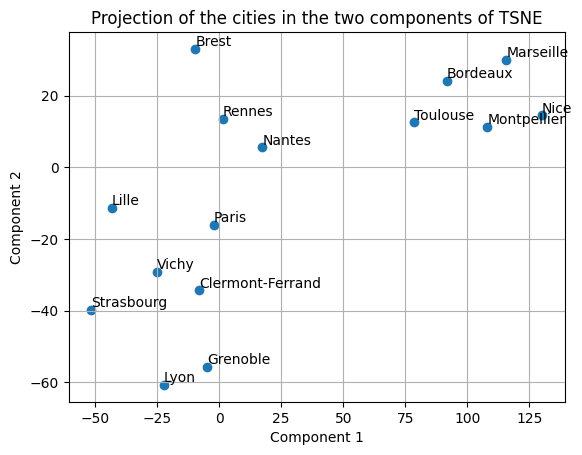

In [100]:
plt.scatter(X_transformed.T[0],X_transformed.T[1])
plt.title("Projection of the cities in the two components of TSNE")
for i, city in enumerate(temper["villes"]):
    plt.text(X_transformed[i][0],X_transformed[i][1], city, fontsize=10, ha='left', va='bottom')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)


**Interpretation**

Our TSNE-based embedding successfully captures and preserves the geographical properties of the cities, allowing us to project our data without relying on linear functions while retaining all the essential information.

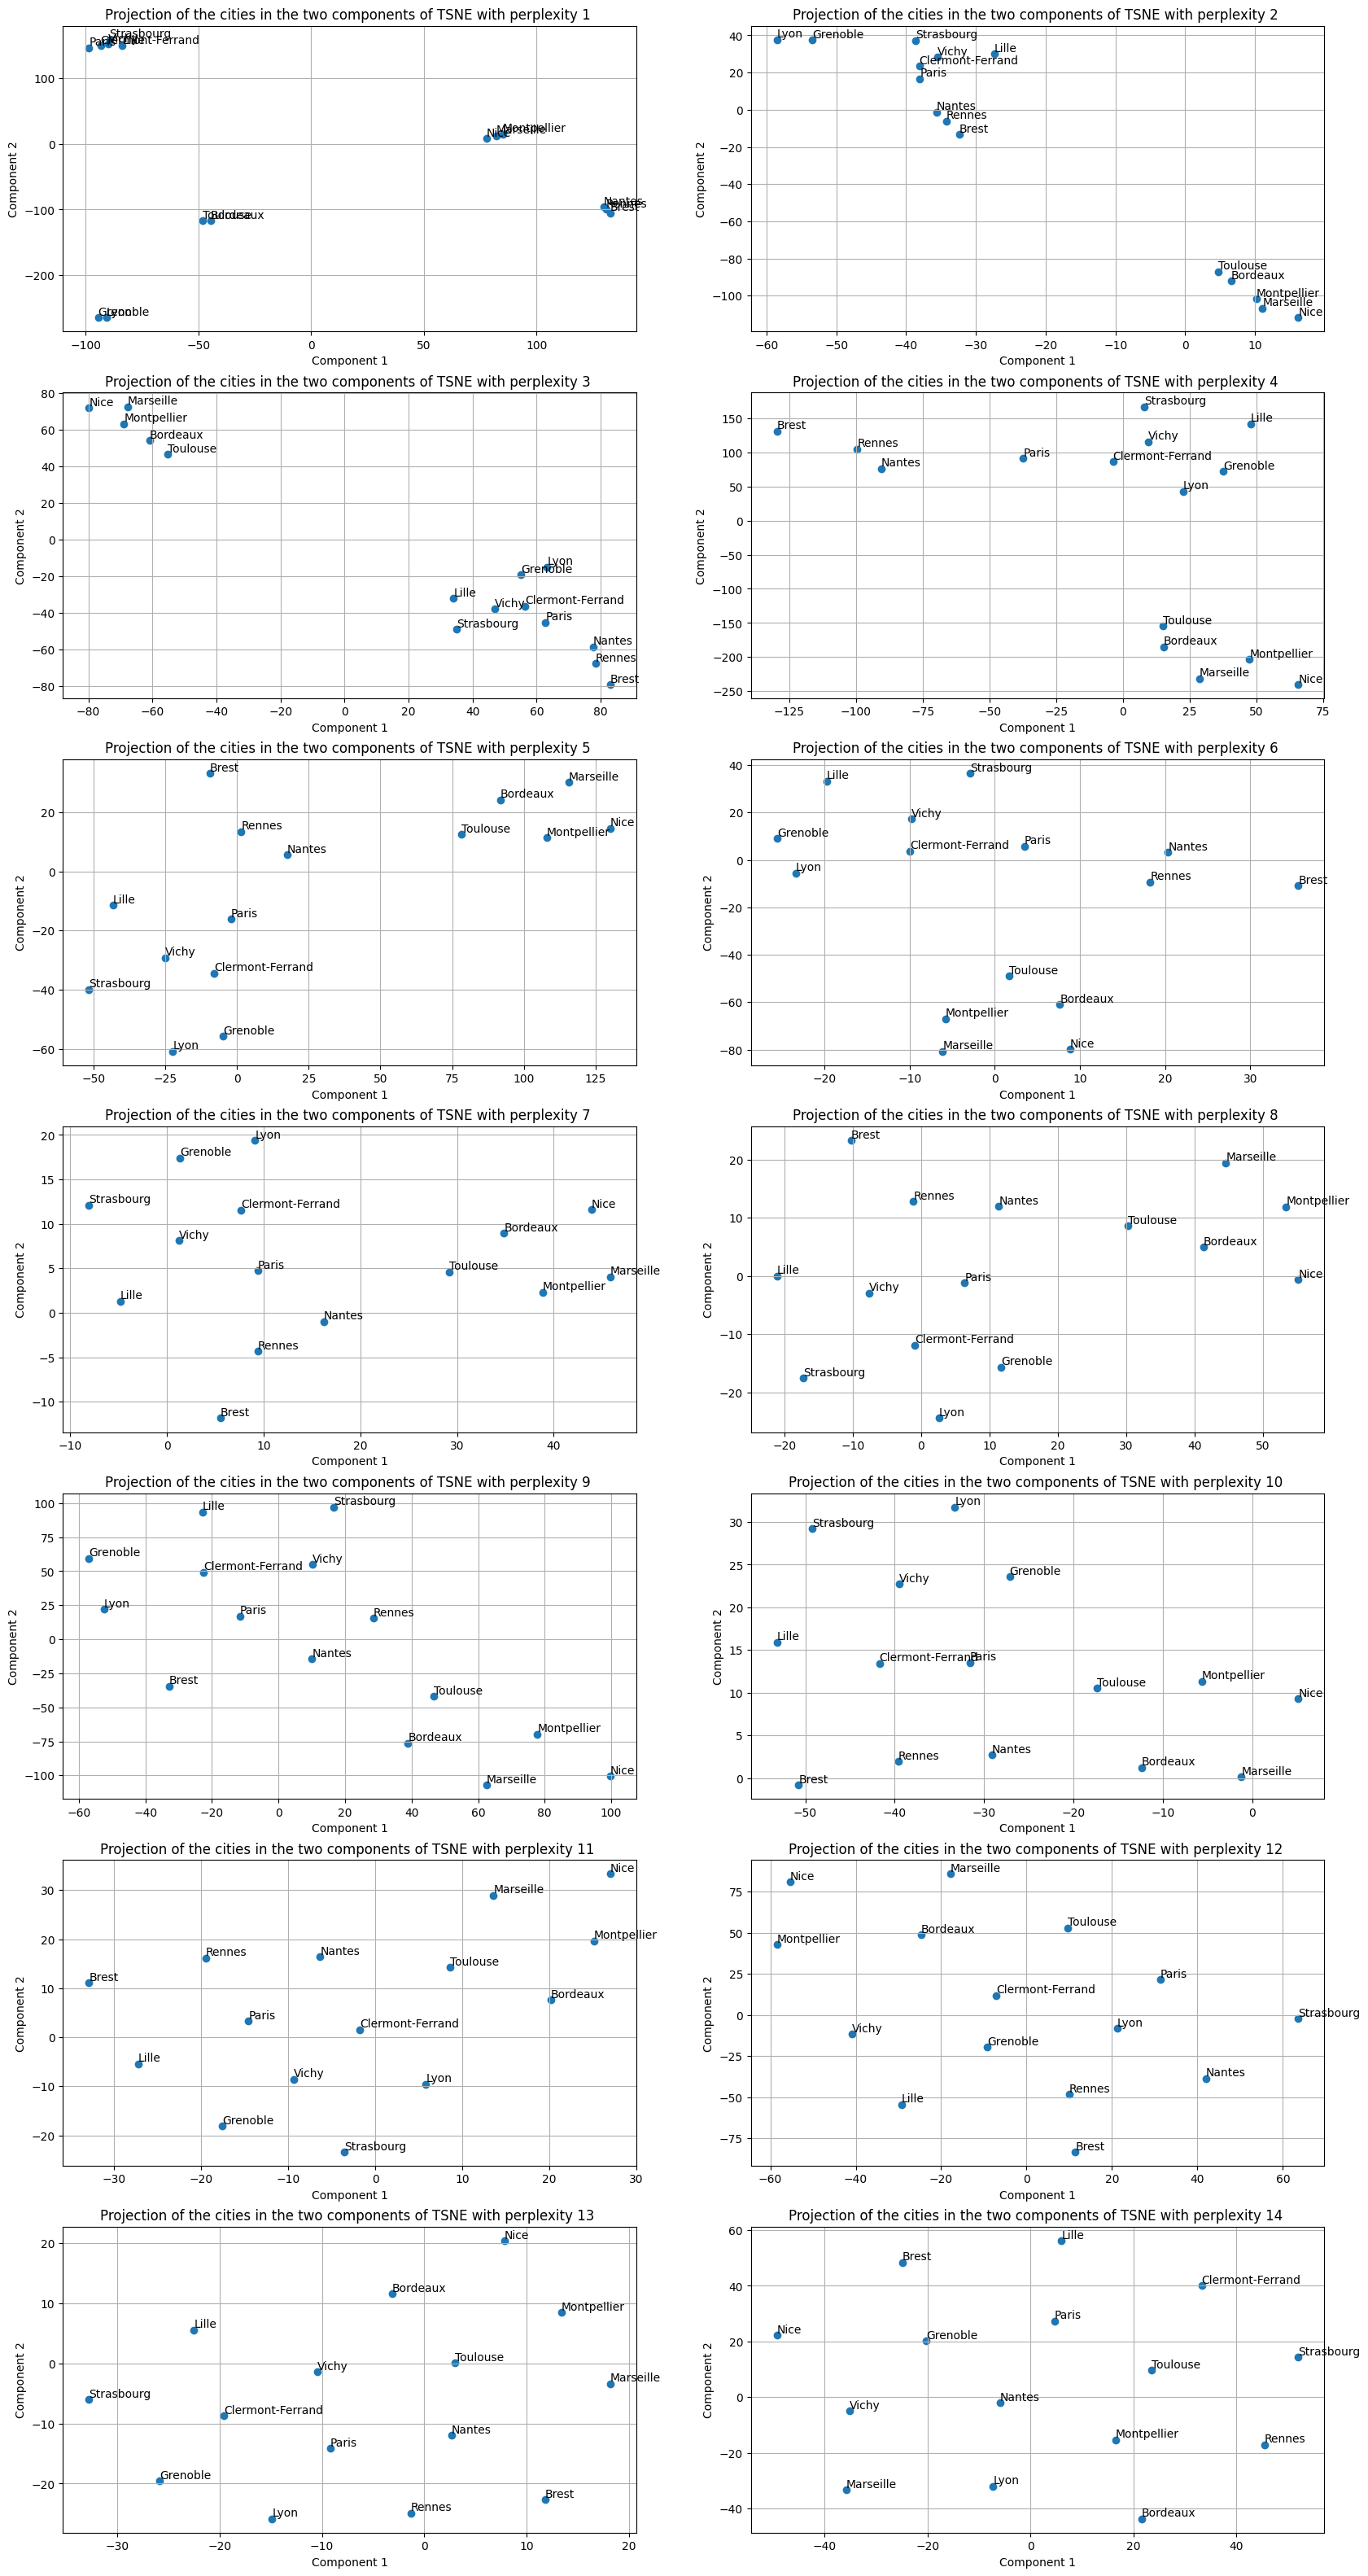

In [120]:
  fig,ax=plt.subplots(7,2,figsize=(20,40))
  k=-1
  for i in range(0,14):
    tsne_temper_try = TSNE(n_components=2,perplexity=i+1)
    tsne_temper_try.fit(x1)
    Embedding_tsne=tsne_temper_try.embedding_
    if i%2==0:
      k=k+1
    ax[k,i%2].scatter(Embedding_tsne.T[0],Embedding_tsne.T[1])
    ax[k,i%2].set_xlabel("Component 1")
    ax[k,i%2].set_ylabel("Component 2")
    ax[k,i%2].set_title(f"Projection of the cities in the two components of TSNE with perplexity {i+1} ")
    for j, city in enumerate(temper["villes"]):
      ax[k,i%2].text(Embedding_tsne[j][0],Embedding_tsne[j][1], city, fontsize=10, ha='left', va='bottom')
    ax[k,i%2].grid(True)



**Interpretation**

By changing the preplexity of the TSNE , we remark that the information carried on by the projection changes , it is so obvious that when we have low preplexity we have seen the projection of  many cities are collapsed and when increasing this preplexity we see that the projection and the information carried for each city will be different .

### Manifold Digit Datset

In [108]:
tsne_digits = TSNE(n_components=2,perplexity=50)
tsne_digits.fit(x2)
X_transformed_digits = tsne_digits.embedding_

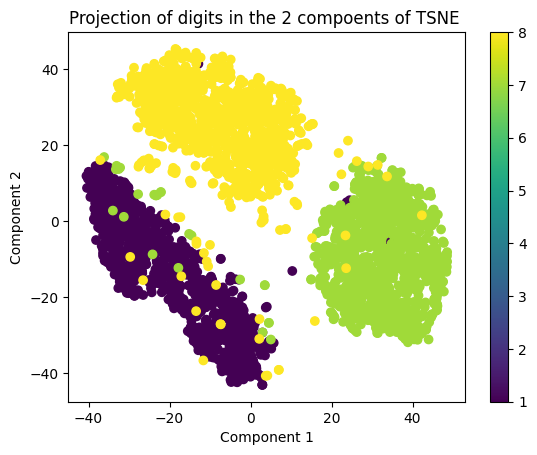

In [105]:
scatter=plt.scatter(X_transformed_digits.T[0],X_transformed_digits.T[1],c=y2)
plt.title("Projection of digits in the 2 compoents of TSNE ")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

**Interpretation**

t-SNE has proven to be highly effective in unveiling three distinct clusters, each corresponding to a unique digit. Within these clusters, individual digits are characterized by specific coordinate ranges across the components. The t-SNE projection skillfully captures and exposes these inherent clustering patterns, showcasing its efficiency, particularly when handling intricate and complex datasets, which sets it apart from linear projection methods.

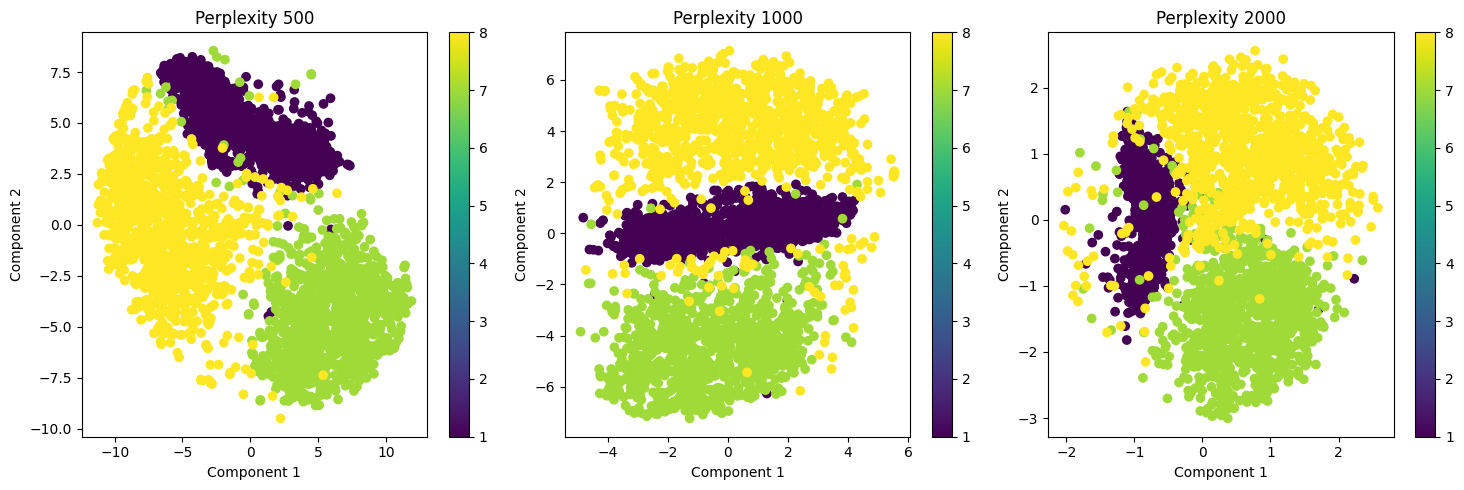

In [107]:
perplexities = [500, 1000, 2000]

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Iterate through the perplexity values and create subplots
for i, perplexity in enumerate(perplexities):
    plt.subplot(1, len(perplexities), i + 1)

    # Perform t-SNE with the current perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(x2)

    # Plot the t-SNE results in the current subplot
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=y2)
    plt.title(f'Perplexity {perplexity}')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar()
plt.tight_layout()
plt.show()






**Interpretation**

Adjusting the perplexity parameter noticeably influences the information contained in the data and impacts the separability between classes. For instance, when perplexity is set to 1000, we can readily distinguish between digits based on the component coordinates. However, when using a lower perplexity, the task of distinguishing between them becomes considerably more challenging.

## Conclusion

In this practical session, we explored various unsupervised methods to analyze and cluster our datasets. We began with the K-means clustering method, which effectively segmented two different datasets. We then compared K-means to a density estimation technique involving a Gaussian mixture model, which exhibited superior performance. However, this method faced limitations concerning sample regeneration, particularly when dealing with outliers.

To address these challenges, we turned to linear projection techniques, such as PCA and NMF, which proved to be highly effective with the temperature dataset due to their simplicity. Nonetheless, we encountered difficulties when working with the digits dataset due to its inherent complexity.

The intricacies of the digits dataset led us to explore manifold learning techniques, specifically t-distributed stochastic neighbor embedding (t-SNE), which enabled us to uncover non-linear separability among the data points, successfully distinguishing between the digits.

Throughout this practical session, we gained a comprehensive understanding of the strengths and weaknesses of each method, allowing us to appreciate the nuances of model performance and the potential challenges that may arise in real-world applications.